<a href="https://colab.research.google.com/github/NancyBudgujjar/AIMLMonth2023/blob/main/IITD_ML_05_FD001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/project/CMaps/train_FD001.txt',sep=" ",header=None)
df_test = pd.read_csv('/content/drive/MyDrive/project/CMaps/test_FD001.txt',sep=" ",header=None)
df_RUL = pd.read_csv('/content/drive/MyDrive/project/CMaps/RUL_FD001.txt',sep=" ",header=None)

In [ ]:
df_train.shape

(20631, 28)

In [ ]:
df_test.shape

(13096, 28)

In [ ]:
df_RUL.shape

(100, 2)

In [ ]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN


In [ ]:
df_test.head() # used to see the first five elements of the data.

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN


In [ ]:
df_RUL.head()

,0,1
0,112,NaN
1,98,NaN
2,69,NaN
3,82,NaN
4,91,NaN


In [ ]:
df_train.drop(columns=[26, 27], inplace=True)
df_test.drop(columns=[26, 27], inplace=True)
df_RUL.drop(columns=[1],inplace=True)

In [ ]:
index_names = ['engine', 'cycle']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names=[ "(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio) (P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]

col_names = index_names + setting_names + sensor_names

The dataset FD001 contains time series of 21 sensors and 3 settings of 100 units(turbofan engine).Each engine works normally at the beginning of each time series and fails at the end of the time series. Each row is a snapshot of the data taken during a single operation cycle.

In [ ]:
df_train.columns = col_names
df_train

,engine,cycle,setting_1,setting_2,setting_3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia),...,(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [ ]:
df_train.shape

(20631, 26)

In [ ]:
df_train.head() # first 5 rows of the F1 training dataset

,engine,cycle,setting_1,setting_2,setting_3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia),...,(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [ ]:
df_train.describe().T  # used to generating descriptive statistics (transposed view)

,count,mean,std,min,25%,50%,75%,max
engine,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
cycle,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
setting_1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
setting_2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
setting_3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
(Fan inlet temperature) (◦R),20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
(LPC outlet temperature) (◦R),20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
(HPC outlet temperature) (◦R),20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
(LPT outlet temperature) (◦R),20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
(Fan inlet Pressure) (psia),20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200


In [ ]:
df_train.info() # used to get concise summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   engine                                   20631 non-null  int64  
 1   cycle                                    20631 non-null  int64  
 2   setting_1                                20631 non-null  float64
 3   setting_2                                20631 non-null  float64
 4   setting_3                                20631 non-null  float64
 5   (Fan inlet temperature) (◦R)             20631 non-null  float64
 6   (LPC outlet temperature) (◦R)            20631 non-null  float64
 7   (HPC outlet temperature) (◦R)            20631 non-null  float64
 8   (LPT outlet temperature) (◦R)            20631 non-null  float64
 9   (Fan inlet Pressure) (psia)              20631 non-null  float64
 10  (bypass-duct pressure) (psia)            20631

In [ ]:
df_train.duplicated().sum() #used to check for duplicate values

0

In [ ]:
df_train.isnull().sum() # used to get count of null values in dataset

engine                                     0
cycle                                      0
setting_1                                  0
setting_2                                  0
setting_3                                  0
(Fan inlet temperature) (◦R)               0
(LPC outlet temperature) (◦R)              0
(HPC outlet temperature) (◦R)              0
(LPT outlet temperature) (◦R)              0
(Fan inlet Pressure) (psia)                0
(bypass-duct pressure) (psia)              0
(HPC outlet pressure) (psia)               0
(Physical fan speed) (rpm)                 0
(Physical core speed) (rpm)                0
(Engine pressure ratio) (P50/P2)           0
(HPC outlet Static pressure) (psia)        0
(Ratio of fuel flow to Ps30) (pps/psia)    0
(Corrected fan speed) (rpm)                0
(Corrected core speed) (rpm)               0
(Bypass Ratio)                             0
(Burner fuel-air ratio)                    0
(Bleed Enthalpy)                           0
(Required 

20631


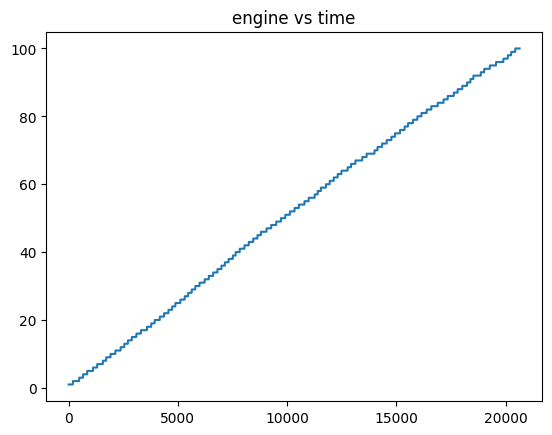

20631


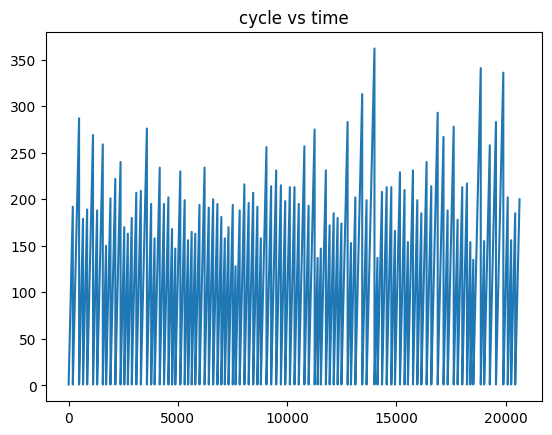

20631


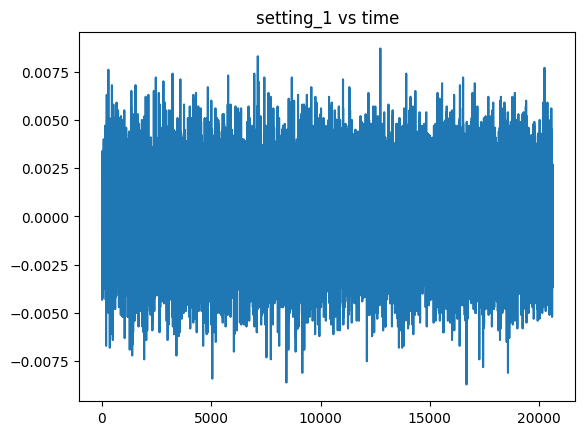

20631


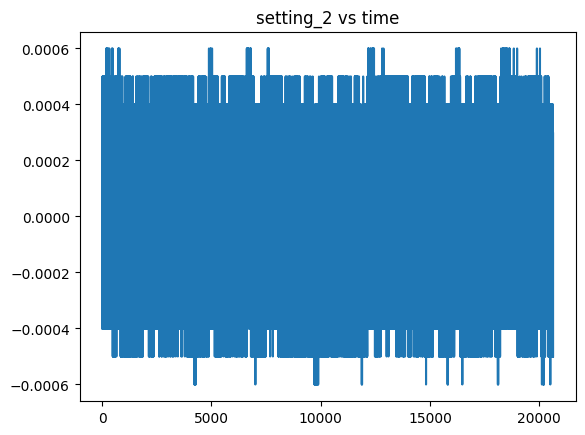

20631


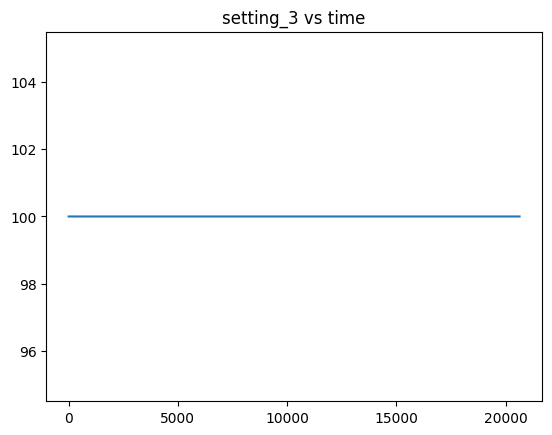

20631


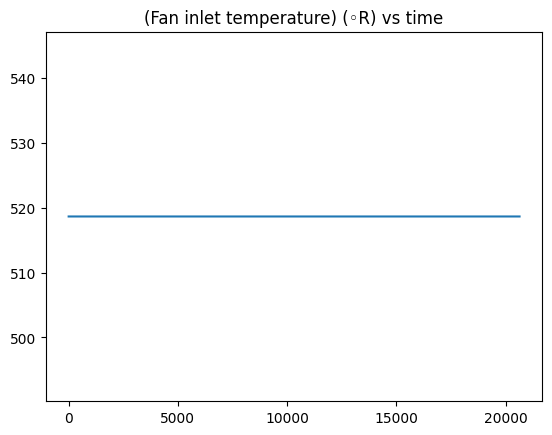

20631


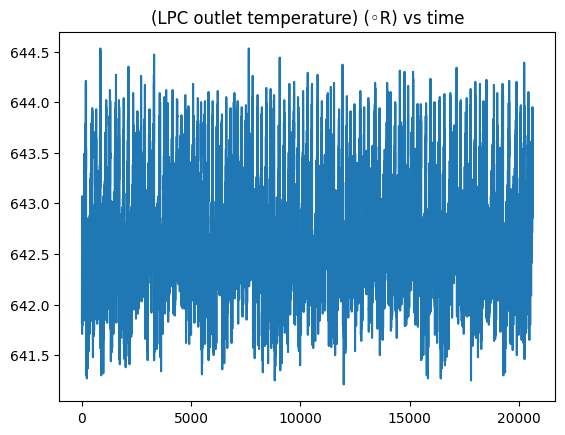

20631


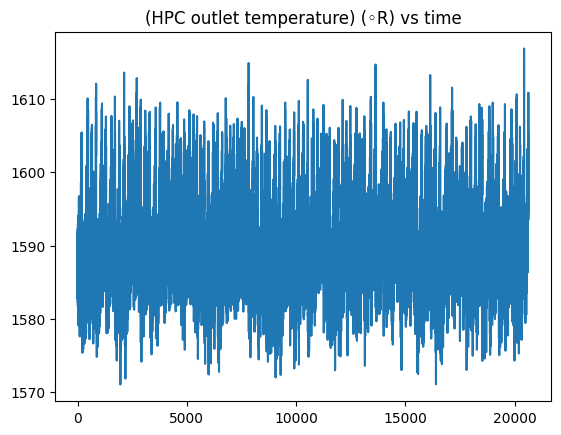

20631


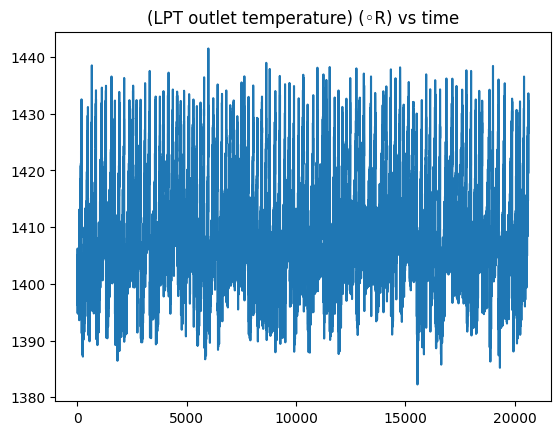

20631


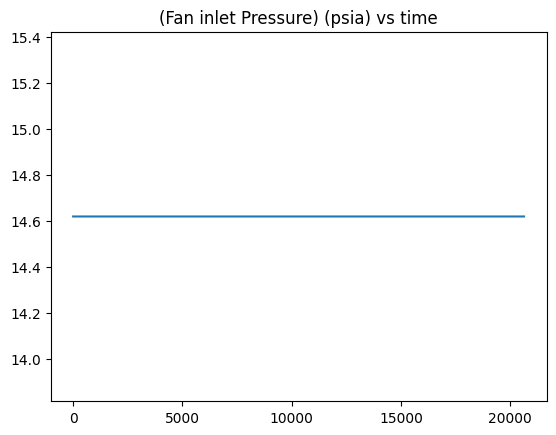

20631


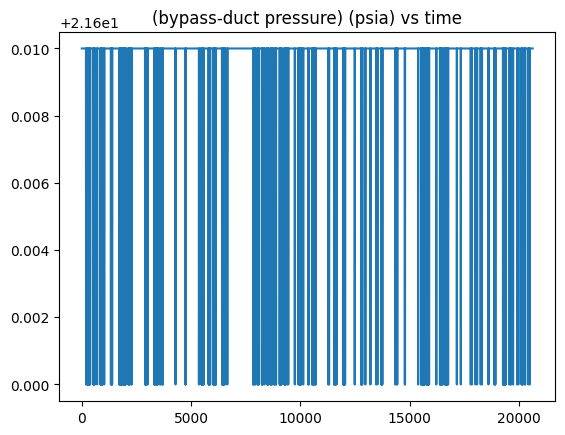

20631


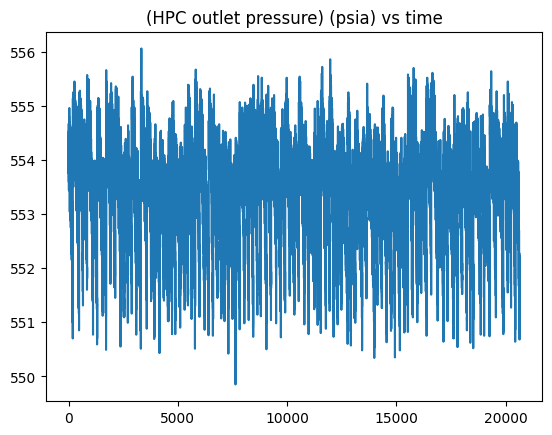

20631


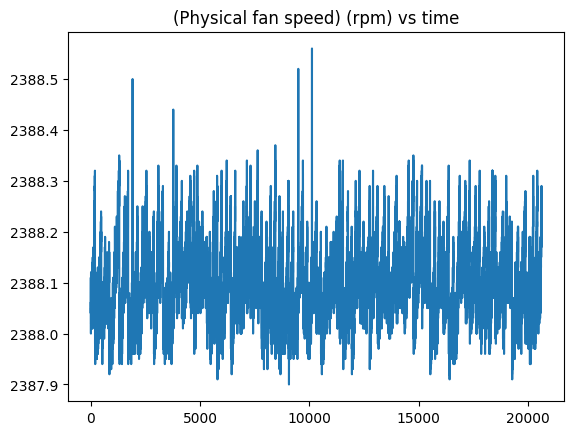

20631


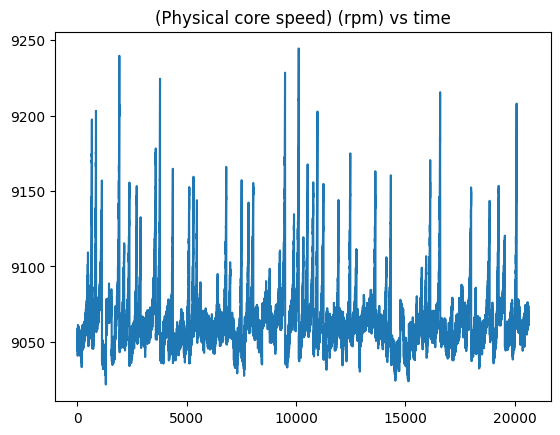

20631


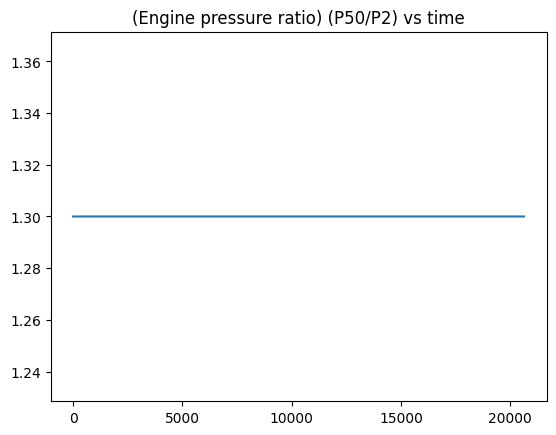

20631


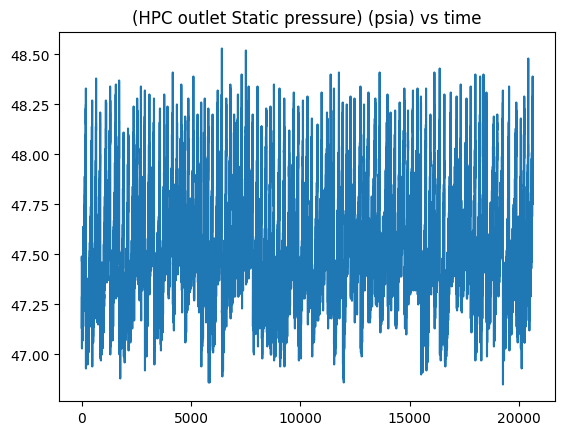

20631


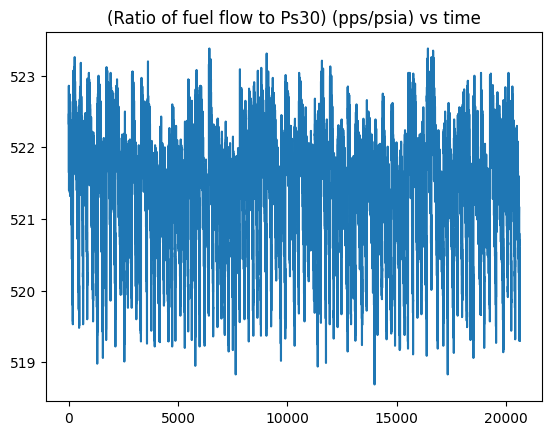

20631


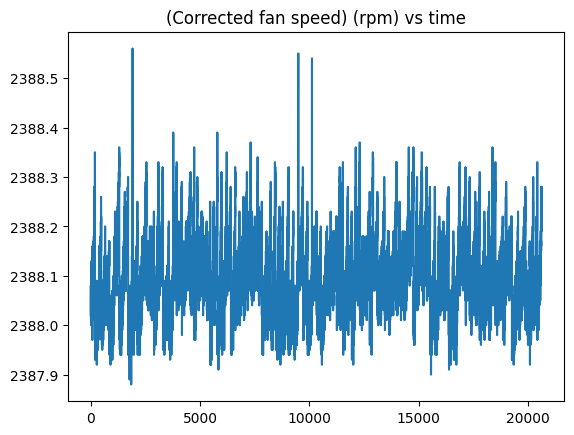

20631


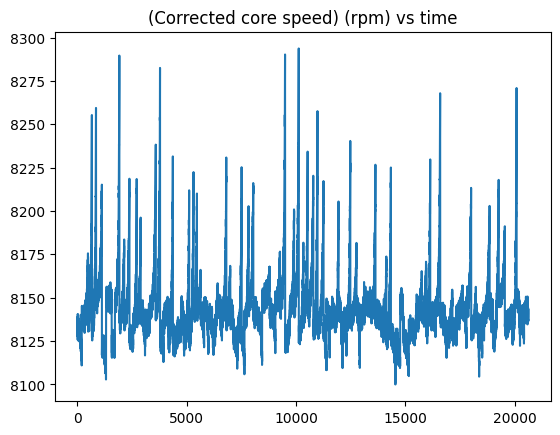

20631


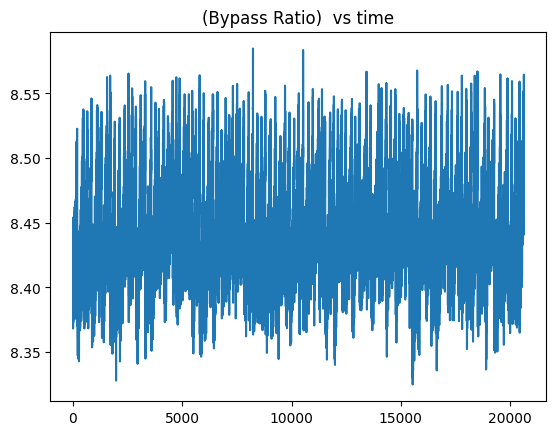

20631


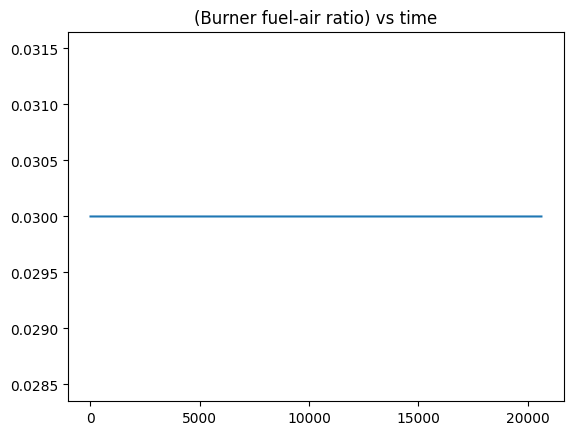

20631


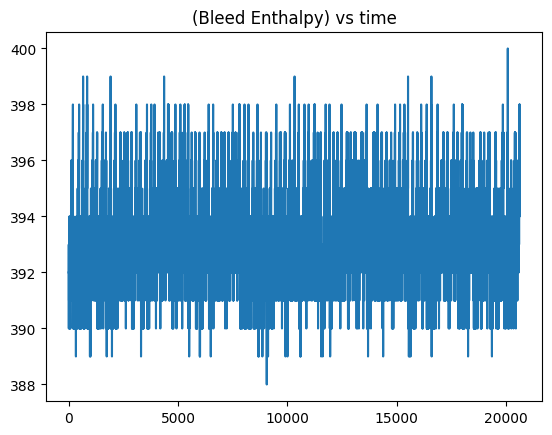

20631


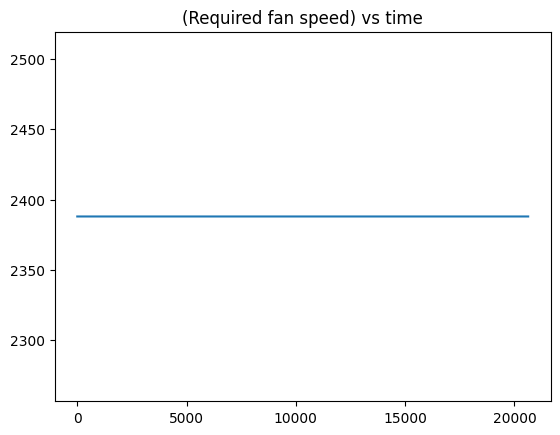

20631


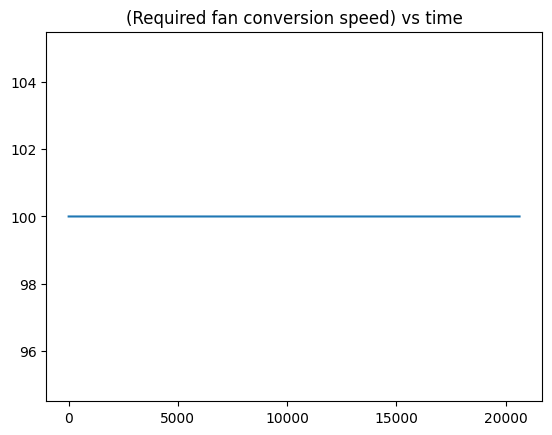

20631


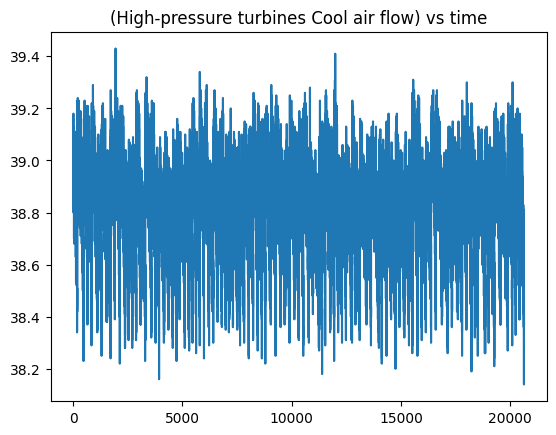

20631


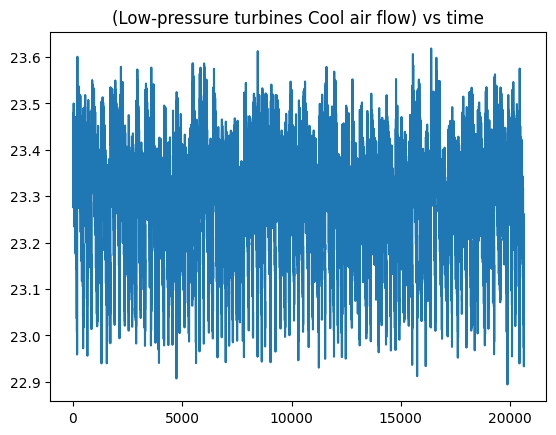

In [ ]:
for i in col_names:
    print(len(df_train[i]))
    plt.plot(range(1, len(df_train[i])+1), df_train[i].to_numpy())
    plt.title(i+" vs time")
    plt.show()

In [ ]:
df_train.nunique() # used to get count of unique values in dataset

engine                                      100
cycle                                       362
setting_1                                   158
setting_2                                    13
setting_3                                     1
(Fan inlet temperature) (◦R)                  1
(LPC outlet temperature) (◦R)               310
(HPC outlet temperature) (◦R)              3012
(LPT outlet temperature) (◦R)              4051
(Fan inlet Pressure) (psia)                   1
(bypass-duct pressure) (psia)                 2
(HPC outlet pressure) (psia)                513
(Physical fan speed) (rpm)                   53
(Physical core speed) (rpm)                6403
(Engine pressure ratio) (P50/P2)              1
(HPC outlet Static pressure) (psia)         159
(Ratio of fuel flow to Ps30) (pps/psia)     427
(Corrected fan speed) (rpm)                  56
(Corrected core speed) (rpm)               6078
(Bypass Ratio)                             1918
(Burner fuel-air ratio)                 

setting_3, (Fan inlet temperature) (◦R), (Fan inlet Pressure) (psia), (Engine pressure ratio) (P50/P2), (Burner fuel-air ratio), (Required fan speed),
(Required fan conversion speed) are the columns which have only 1 unique value, i.e., the column value is constant and we can say it is not changing much. These column does not help in predicting the output.

In [ ]:
# making a list of columns with 1 unique value
unwanted=[]
for i in df_train.select_dtypes(include=np.number):
    if df_train[i].nunique()==1:
        unwanted.append(i)
print(unwanted)

['setting_3', '(Fan inlet temperature) (◦R)', '(Fan inlet Pressure) (psia)', '(Engine pressure ratio) (P50/P2)', '(Burner fuel-air ratio)', '(Required fan speed)', '(Required fan conversion speed)']


In [ ]:
#Drop the column with 1 unique value
df_train.drop(columns=unwanted, inplace=True)
df_train.shape

(20631, 19)

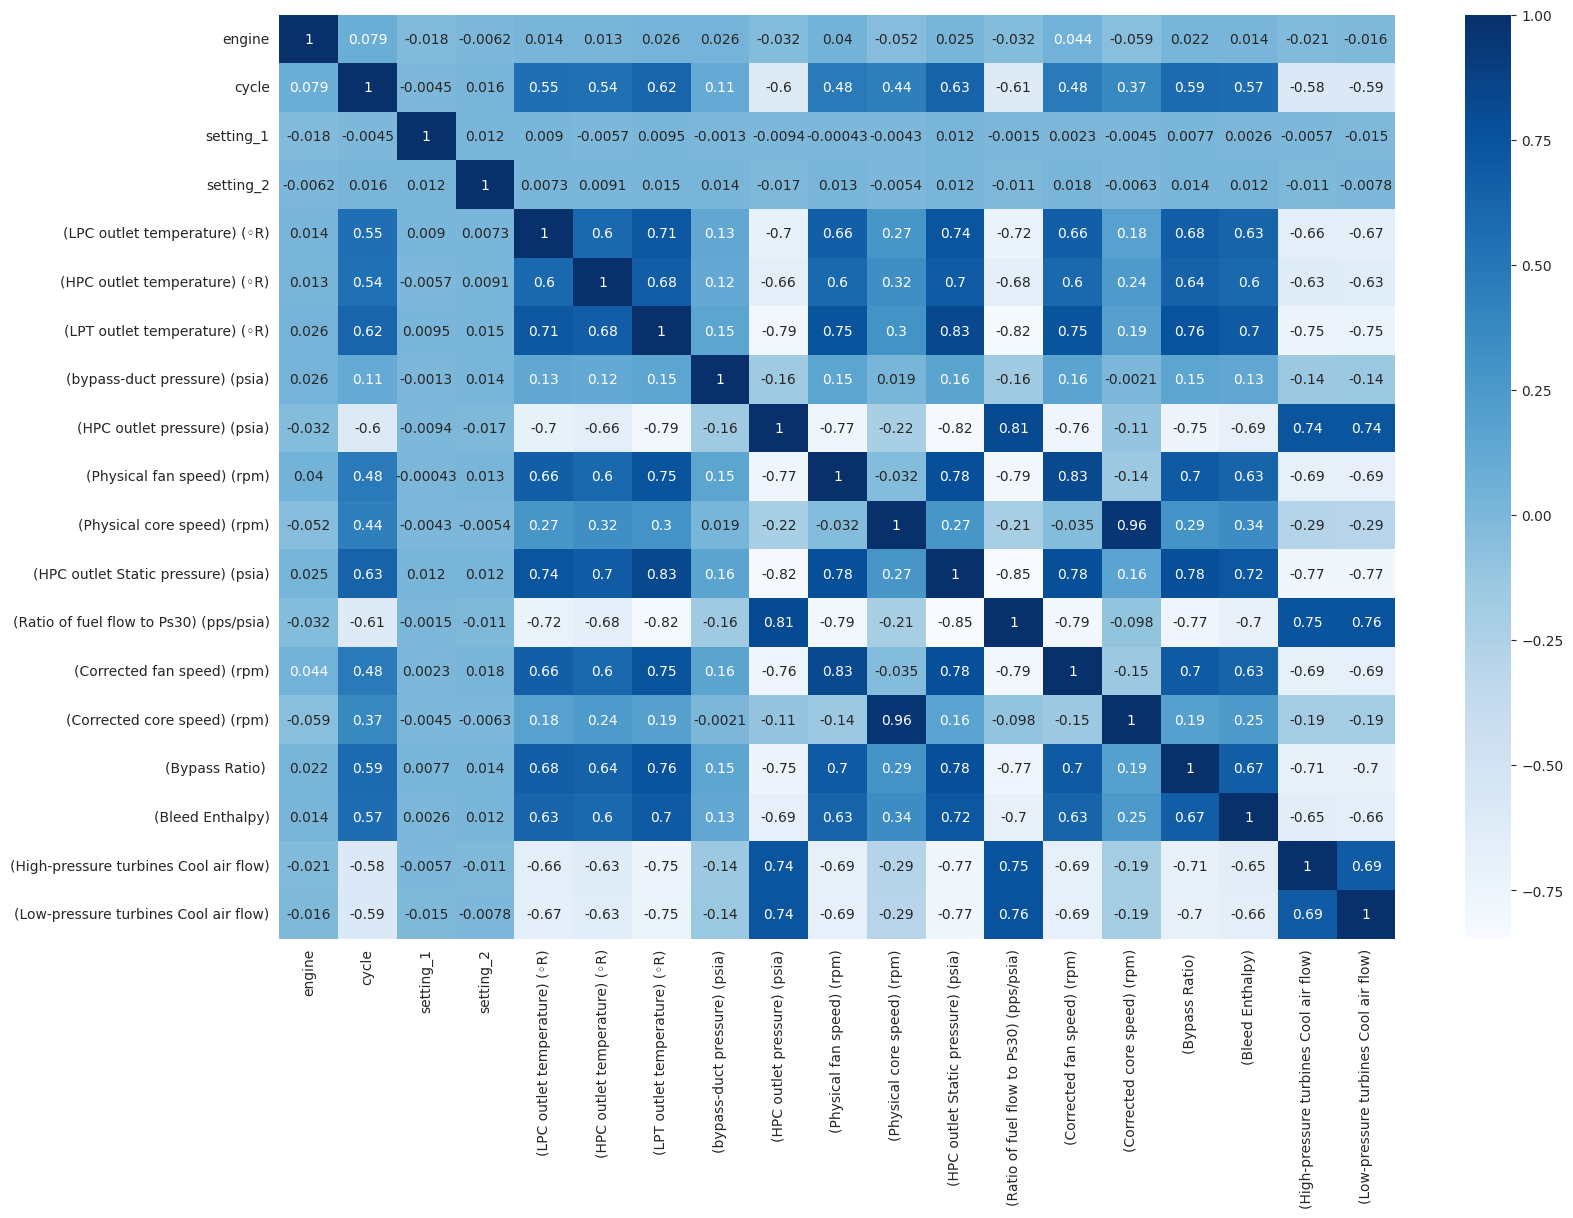

In [ ]:
# correlation metrics
plt.figure(figsize=(18,12))
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = df_train.corr()
plot_kws={"s": 1}
sns.heatmap(df_train.corr(), cmap='Blues', annot=True, linecolor='lightgrey').set_facecolor('white')

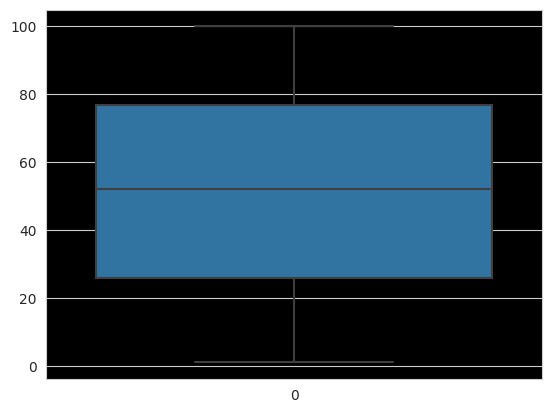

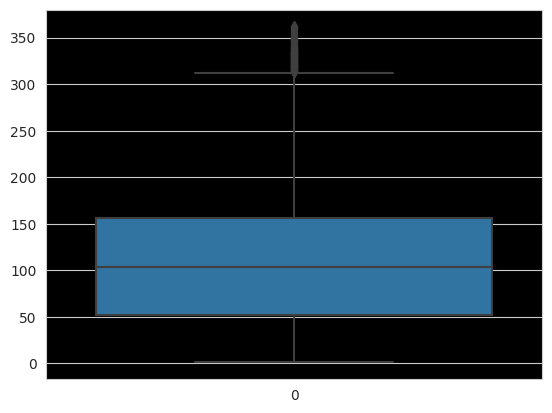

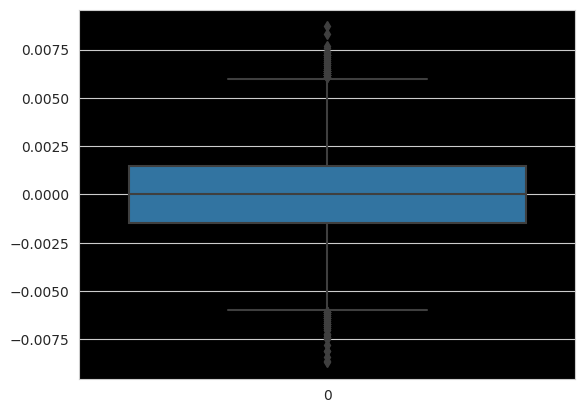

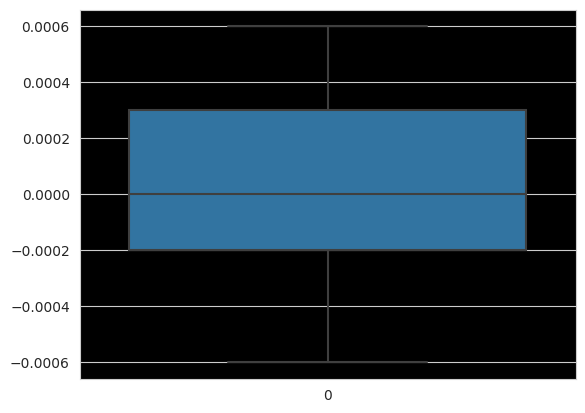

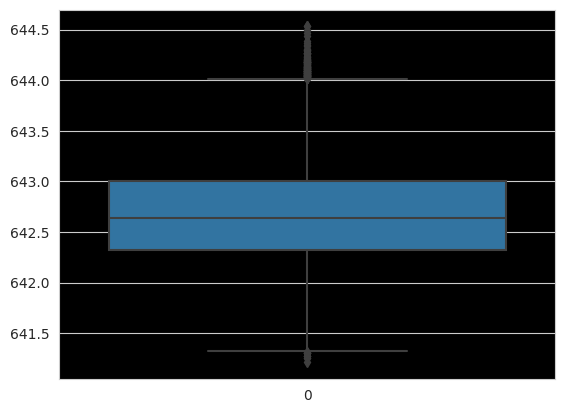

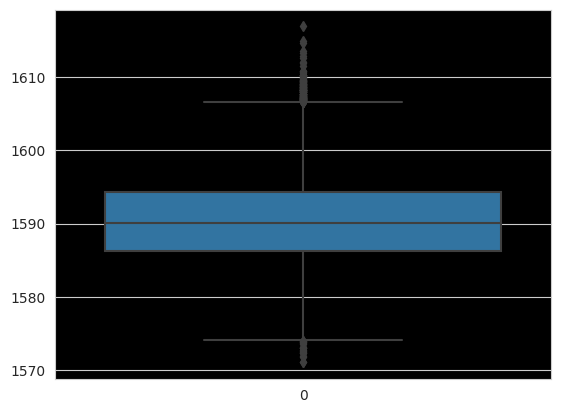

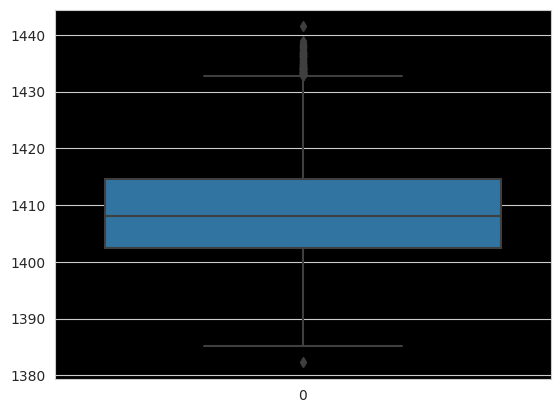

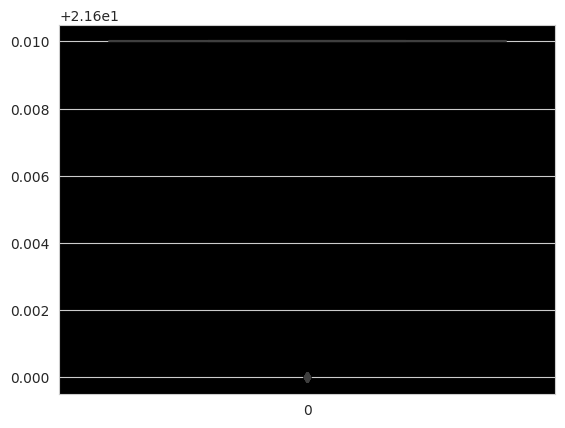

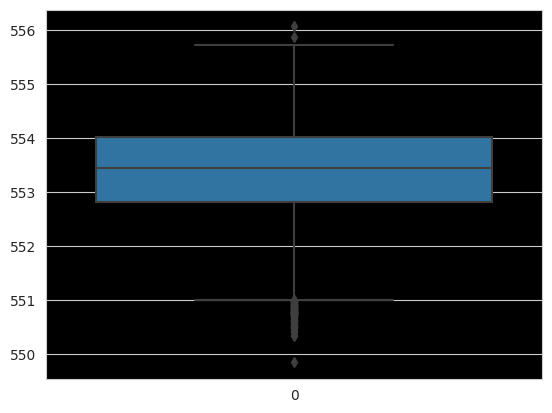

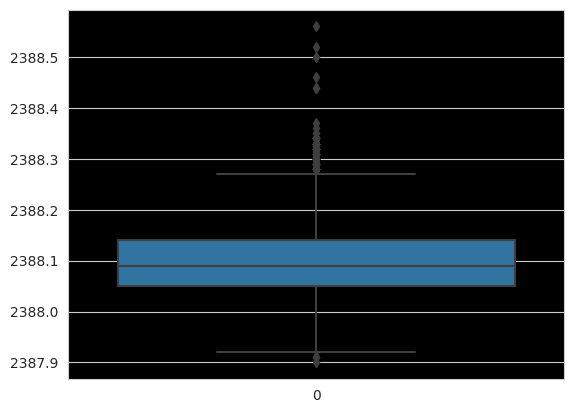

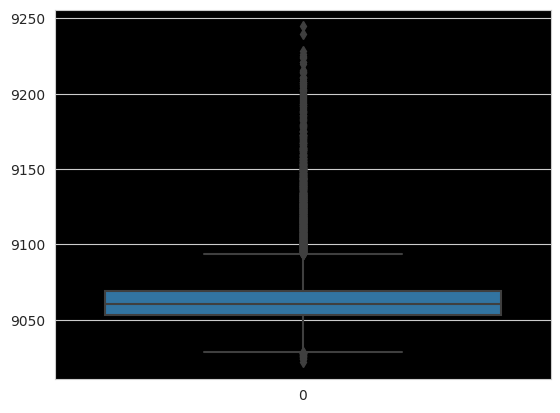

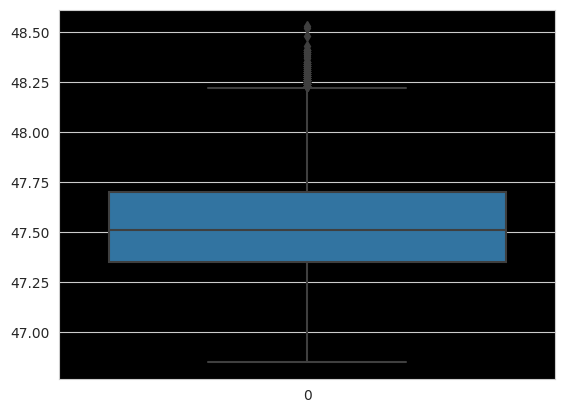

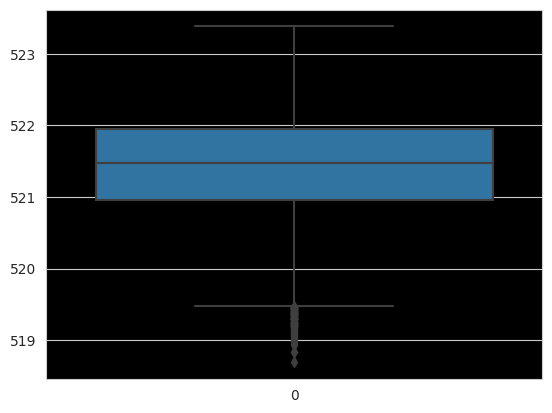

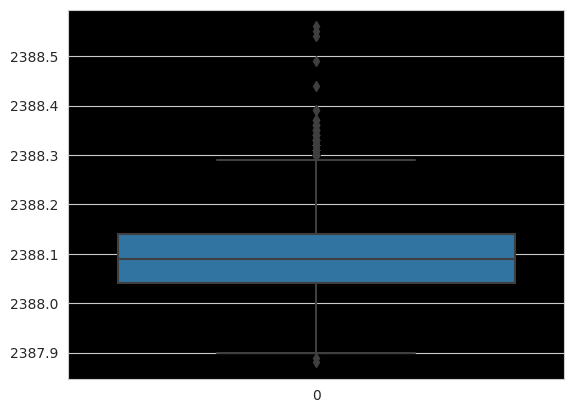

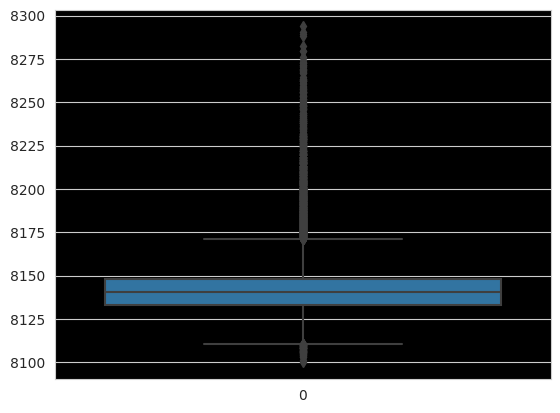

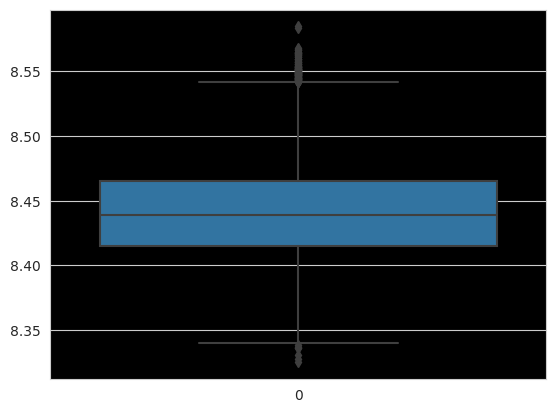

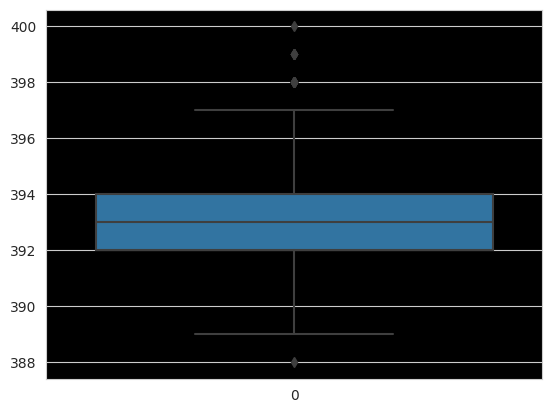

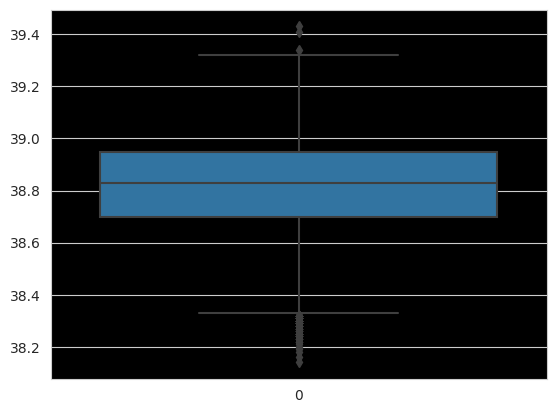

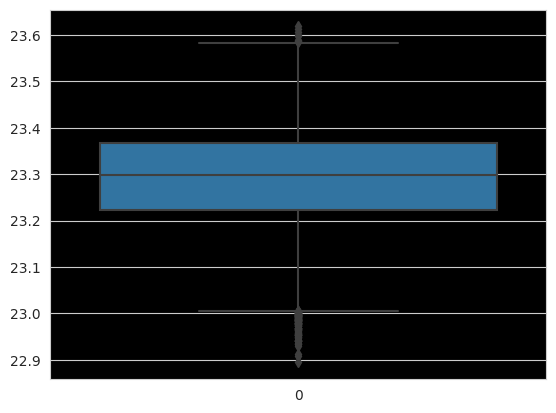

In [ ]:
for i in df_train.select_dtypes(include=np.number):
  sns.boxplot(df_train[i])
  plt.show()

#Outler Detection and Treatment
bypass air:The ratio of the air that goes around the engine to the air that goes through the core is called the bypass ratio. A low pressure compressor (LPC) and high pressure compressor (HPC) supply compressed high temperature, high pressure gases to the combustor. Low pressure turbine (LPT) can decelerate and pressurize air to improve the chemical energy conversion efficiency of aviation kerosene. High pressure turbines (HPT) generate mechanical energy by using high temperature and high pressure gas strike turbine blades. Low-pressure rotor (N1), high-pressure rotor (N2), and nozzle guarantee the combustion efficiency of the engine.

In [ ]:
df_train['(bypass-duct pressure) (psia)'].unique()

array([21.61, 21.6 ])

In [ ]:
# how much percentage of the column have value of 21.61?
(((df_train['(bypass-duct pressure) (psia)']==21.61).sum())/df_train.shape[0])*100

98.0320876351122

In [ ]:
# how much percentage of the column have value of 21.6?
(((df_train['(bypass-duct pressure) (psia)']==21.6).sum())/df_train.shape[0])*100

1.9679123648877903

98% (bypass-duct pressure) has 26.61psia, and 1.9% has 26.6psia.
 Also, 26.61 is almost equal to 26.6., that means, we have only 1 unique value, so will drop this column

In [ ]:
df_train.drop(['(bypass-duct pressure) (psia)'],axis=1,inplace=True)

In [ ]:
df_train.shape

(20631, 18)

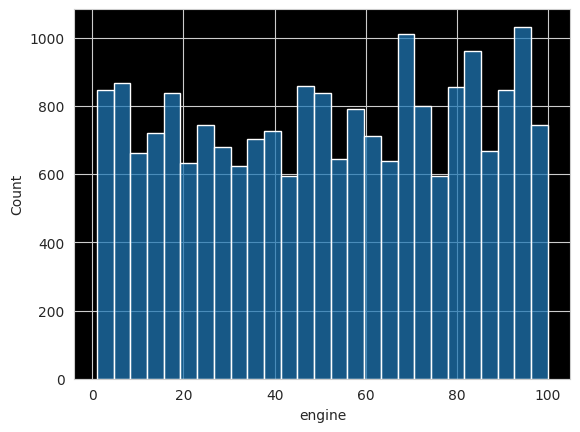

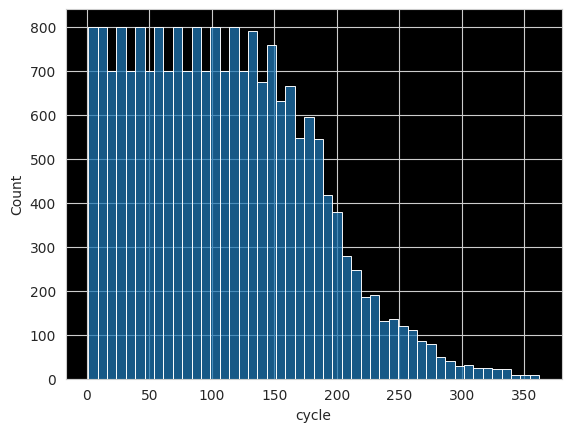

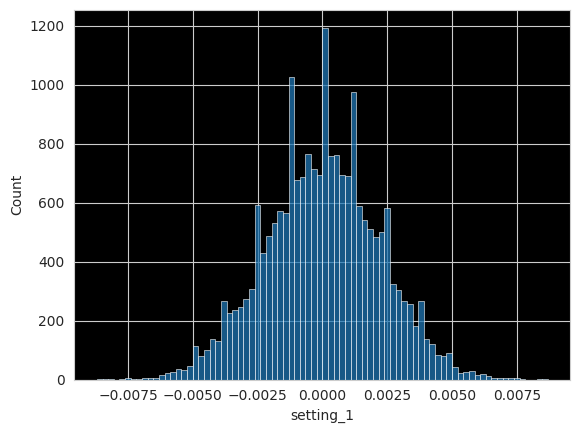

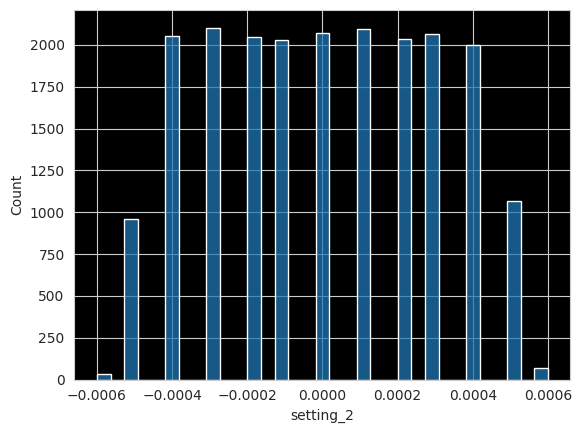

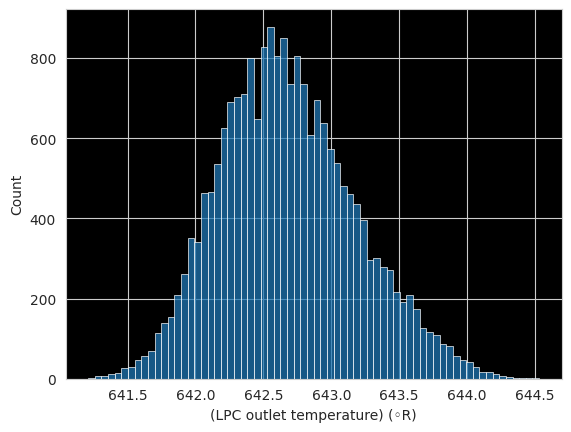

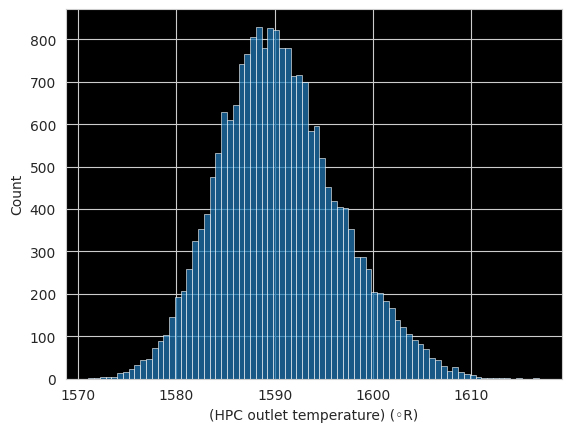

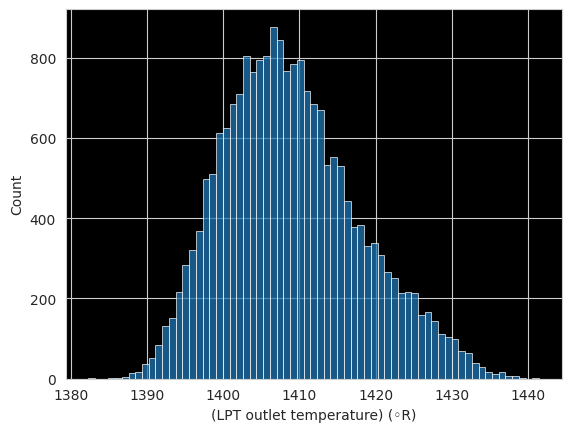

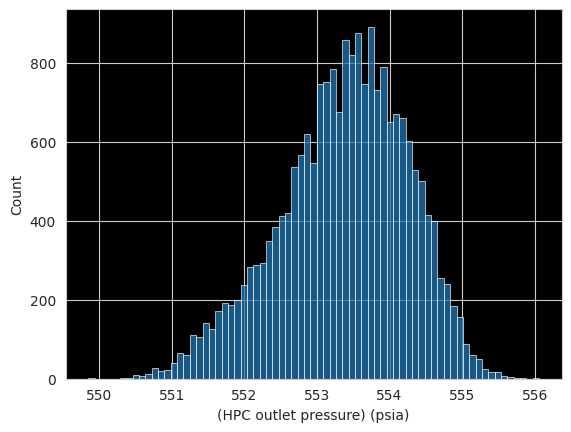

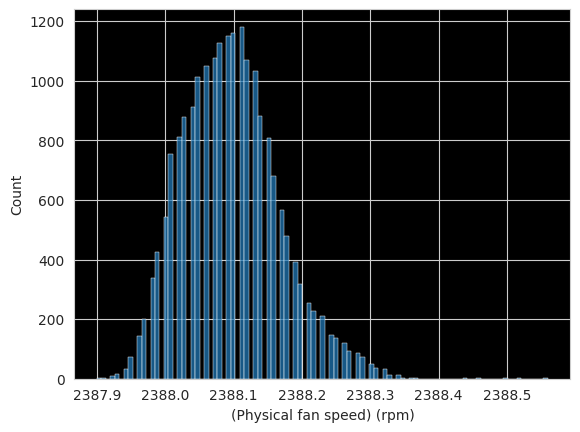

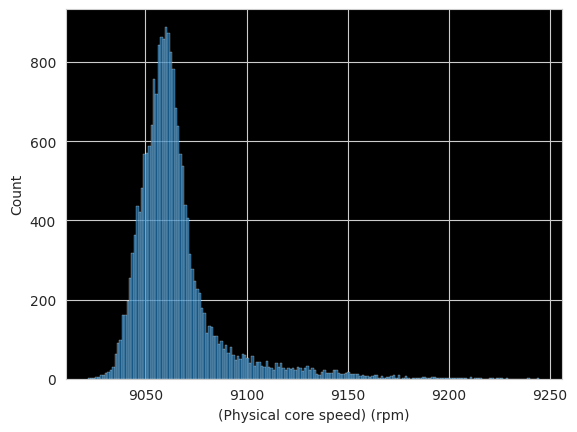

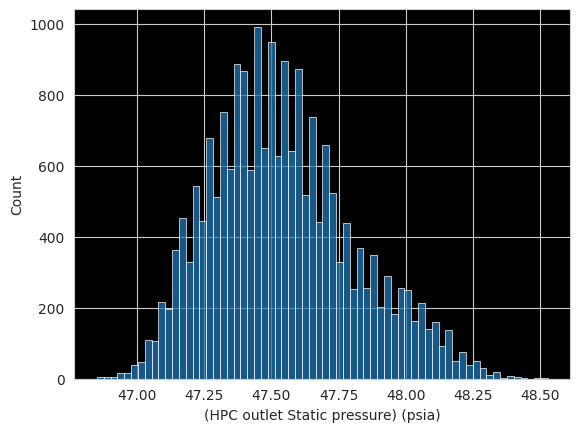

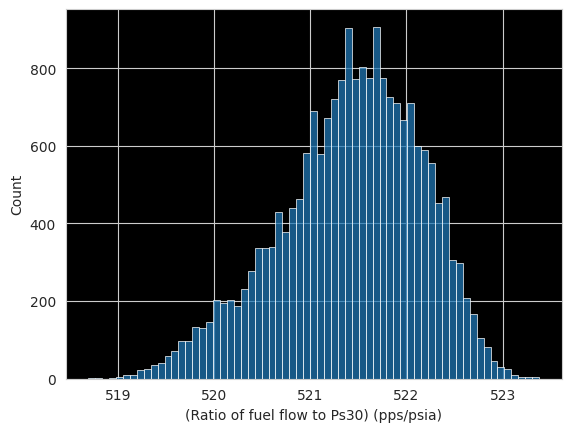

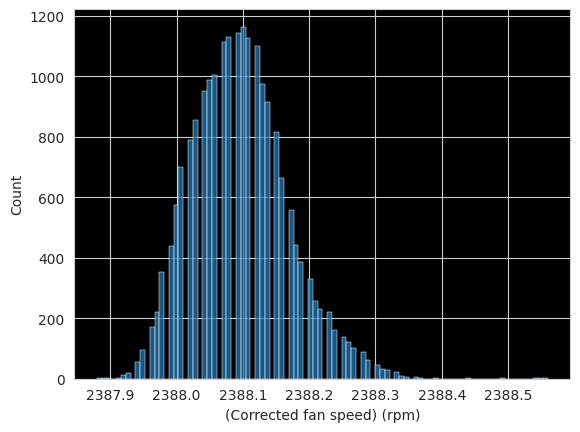

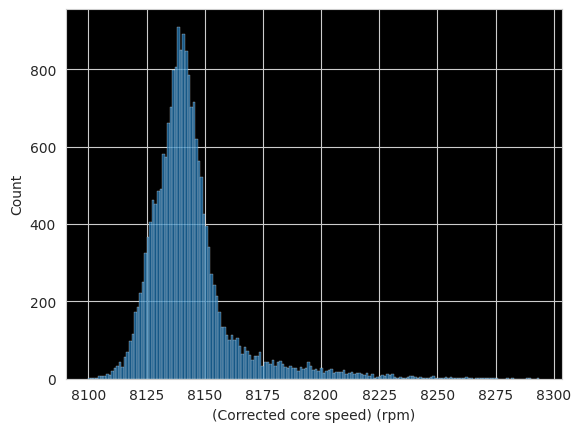

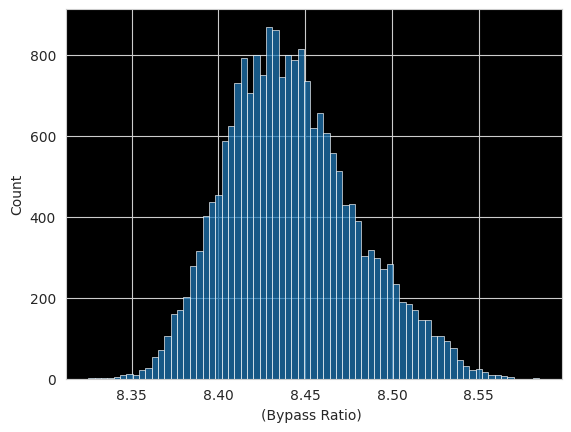

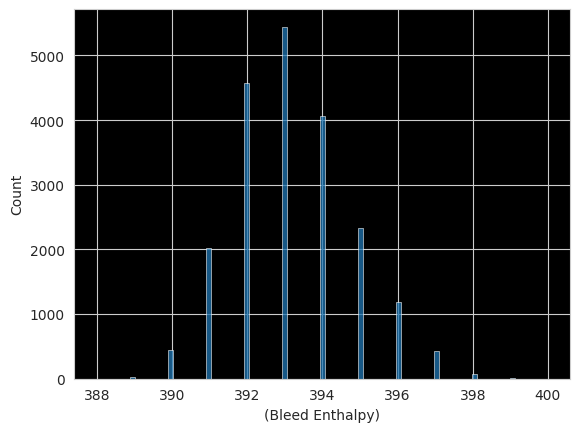

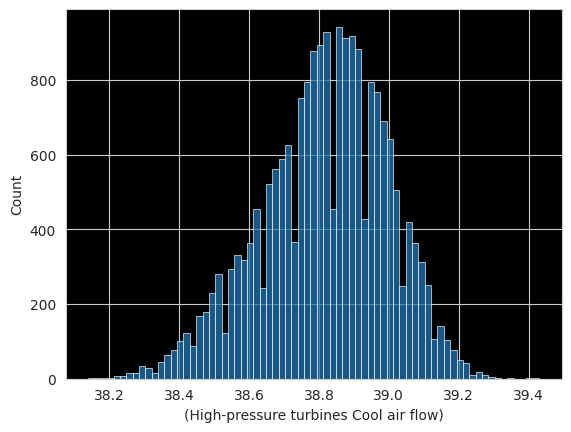

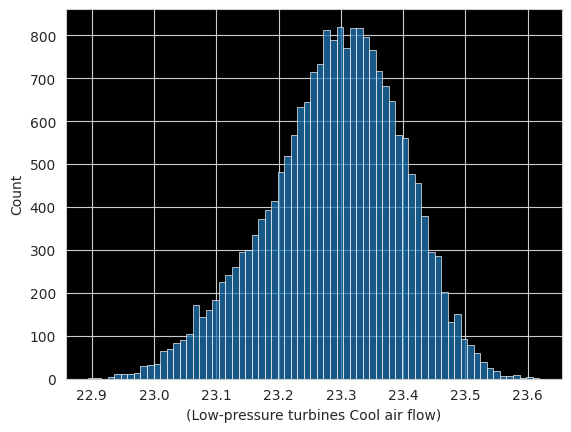

In [ ]:
for i in df_train.select_dtypes(include=np.number):
  sns.histplot(df_train[i])
  plt.show()

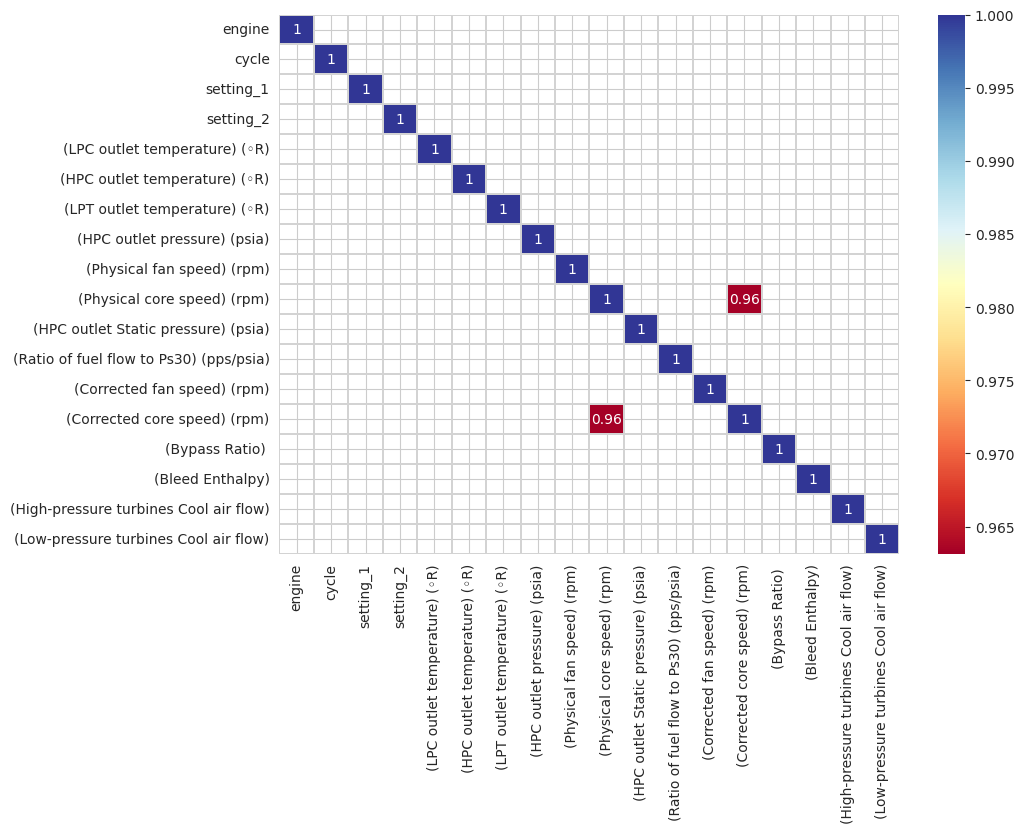

In [ ]:
threshold = 0.95 # threshold for co-relation among columns
plt.figure(figsize=(10,7))

sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = df_train.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2, cmap='RdYlBu', annot=True, mask=mask, linewidths=0.2, linecolor='lightgrey').set_facecolor('white')

Drop one of the highly correlated features and keep the other. The threshold for correlation is set at 0.95

By correlation plot we got to know, '(Corrected core speed)(rpm)' and '(Physical core speed)(rpm)' have high correlation, so will drop one ['(Corrected core speed) (rpm)']

In [ ]:
df_train.drop(['(Corrected core speed) (rpm)'],axis=1,inplace=True)

Each cycle of a turbo engine generates a certain amount of wear and tear on its components, and the performance of the engine may degrade over time due to various factors, such as aging, contamination, or damage. Therefore, monitoring the engine cycles and predicting its remaining useful life (RUL) is crucial for ensuring its reliability and safety.
RUL (remaining useful life) is equivalent of number of flights remained for the engine after the last datapoint in the test dataset. Add RUL as a target feature to the data

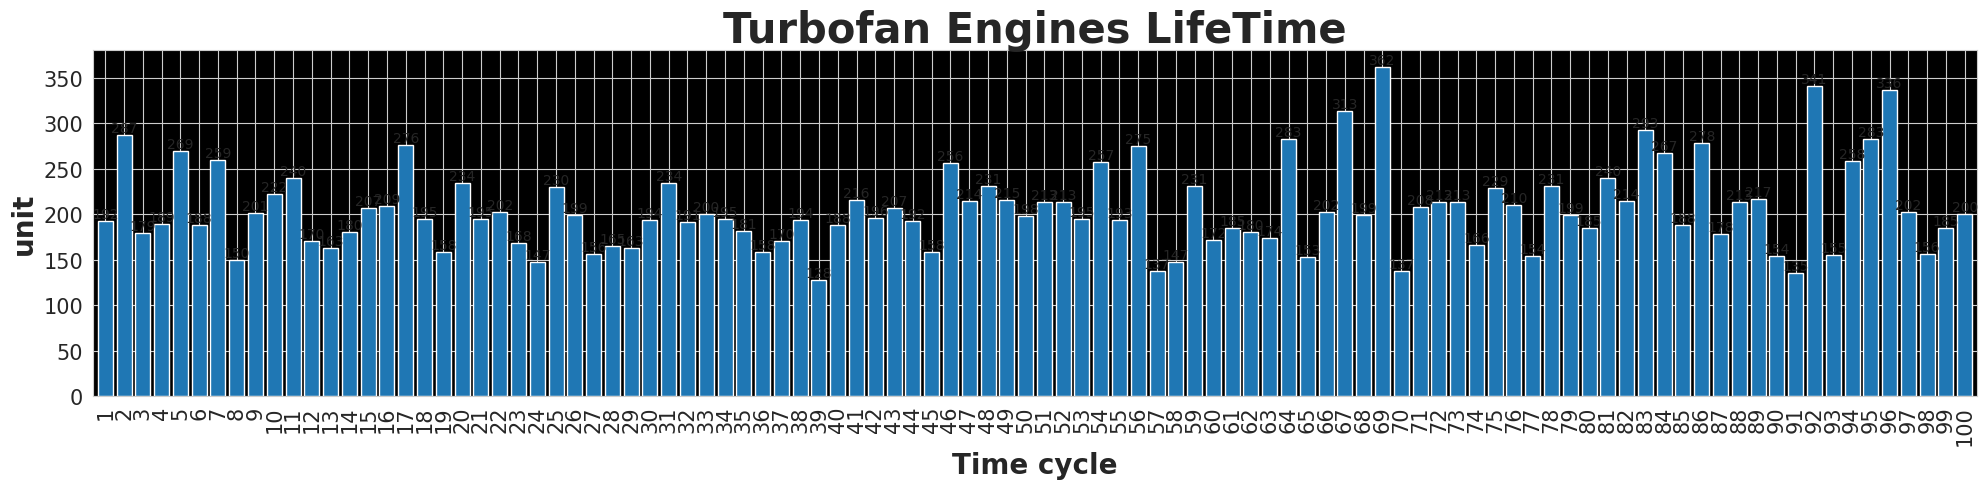

In [ ]:
max_time_cycles=df_train[index_names].groupby('engine').max()
plt.figure(figsize=(20,5))
ax=max_time_cycles['cycle'].plot(kind='bar',width=0.8, stacked=True, align='center')
for l in ax.containers:
    ax.bar_label(l)
plt.title('Turbofan Engines LifeTime', fontweight='bold', size=30)
plt.xlabel('Time cycle', fontweight='bold', size=20)
plt.xticks(size=15)
plt.ylabel('unit',fontweight='bold', size=20)
plt.yticks(size=15)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df_train['cycle'].max()   # define the maximum life of each engine, as this could be used to obtain the RUL at each point in time of the engine's life

data_train_RUL = df_train.groupby(['engine']).agg({'cycle':'max'})
data_train_RUL.rename(columns={'cycle':'life'},inplace=True)
data_train_RUL

,life
engine,
1,192
2,287
3,179
4,189
5,269
...,...
96,336
97,202
98,156


In [ ]:
df_train = df_train.merge(data_train_RUL, how='left', on = ['engine'])

In [ ]:
df_train['RUL']= df_train['life'] - df_train['cycle']
df_train.head()

,engine,cycle,setting_1,setting_2,(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(HPC outlet pressure) (psia),(Physical fan speed) (rpm),(Physical core speed) (rpm),(HPC outlet Static pressure) (psia),(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Bypass Ratio),(Bleed Enthalpy),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow),life,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,192,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,192,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,192,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,192,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,192,187


#Problem Formulation
The challange of this competetion was to predict the Remaining Useful Life of the engine by using the given sensor's data and operational conditions. But, we will try to simplify that by converting it to a Classification Problem, where the class labels will be of 3 types, i.e. Good Condition, Moderate Condition and Warning Condition.

Labels corresponding to each conditions:


1.   Good Condition - 0

2.   Moderate Condition - 1
3.   Warning Condition - 2

Defining the labels:
we will define the engine's condition with Life Ratio (LR), which is the ratio between Current Cycle and the End cycle(end_of_life). If LR=0, that means the component has just started its degradation and LR=1 means, it is completely degraded.

if LR <= 0.6 - Good Condition
if LR <= 0.8 - Moderate Condition
if 0.8 < LR - Warning Condition

In [ ]:
df_train["LR"] = df_train["cycle"].div(df_train['life']) #Calculate LR
df_train.head()

,engine,cycle,setting_1,setting_2,(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(HPC outlet pressure) (psia),(Physical fan speed) (rpm),(Physical core speed) (rpm),(HPC outlet Static pressure) (psia),(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Bypass Ratio),(Bleed Enthalpy),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow),life,RUL,LR
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,192,191,0.005208
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,192,190,0.010417
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,192,189,0.015625
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,192,188,0.020833
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,192,187,0.026042


In [ ]:
labels=[]
for i in range (0,len(df_train)):
  if np.array(df_train["LR"])[i] <= 0.6:
    labels.append(0)
  elif np.array(df_train["LR"])[i] <= 0.8:
    labels.append(1)
  else :
    labels.append(2)

df_train["labels"]= labels
df_train.head()

,engine,cycle,setting_1,setting_2,(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(HPC outlet pressure) (psia),(Physical fan speed) (rpm),(Physical core speed) (rpm),...,(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Bypass Ratio),(Bleed Enthalpy),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow),life,RUL,LR,labels
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,...,521.66,2388.02,8.4195,392,39.06,23.4190,192,191,0.005208,0
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,...,522.28,2388.07,8.4318,392,39.00,23.4236,192,190,0.010417,0
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,...,522.42,2388.03,8.4178,390,38.95,23.3442,192,189,0.015625,0
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,...,522.86,2388.08,8.3682,392,38.88,23.3739,192,188,0.020833,0
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,...,522.19,2388.04,8.4294,393,38.90,23.4044,192,187,0.026042,0


In [ ]:
# Dropping these column because we have used them to create label (now these do not have much significance)
# RUL is not deleted becuase we still have ot use it to delte uncessary features
df_train= df_train.drop(columns=['cycle','life','LR'])
df_train.head()

,engine,setting_1,setting_2,(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(HPC outlet pressure) (psia),(Physical fan speed) (rpm),(Physical core speed) (rpm),(HPC outlet Static pressure) (psia),(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Bypass Ratio),(Bleed Enthalpy),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow),RUL,labels
0,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191,0
1,1,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190,0
2,1,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189,0
3,1,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188,0
4,1,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187,0


RUL prediction is only useful nearer to the end of the engine's life, therefore we put an upper limit on the RUL this is a bit sneaky, since it supposes that the test set has RULs of less than this value, the closer you areto the true value, the more accurate the model will be

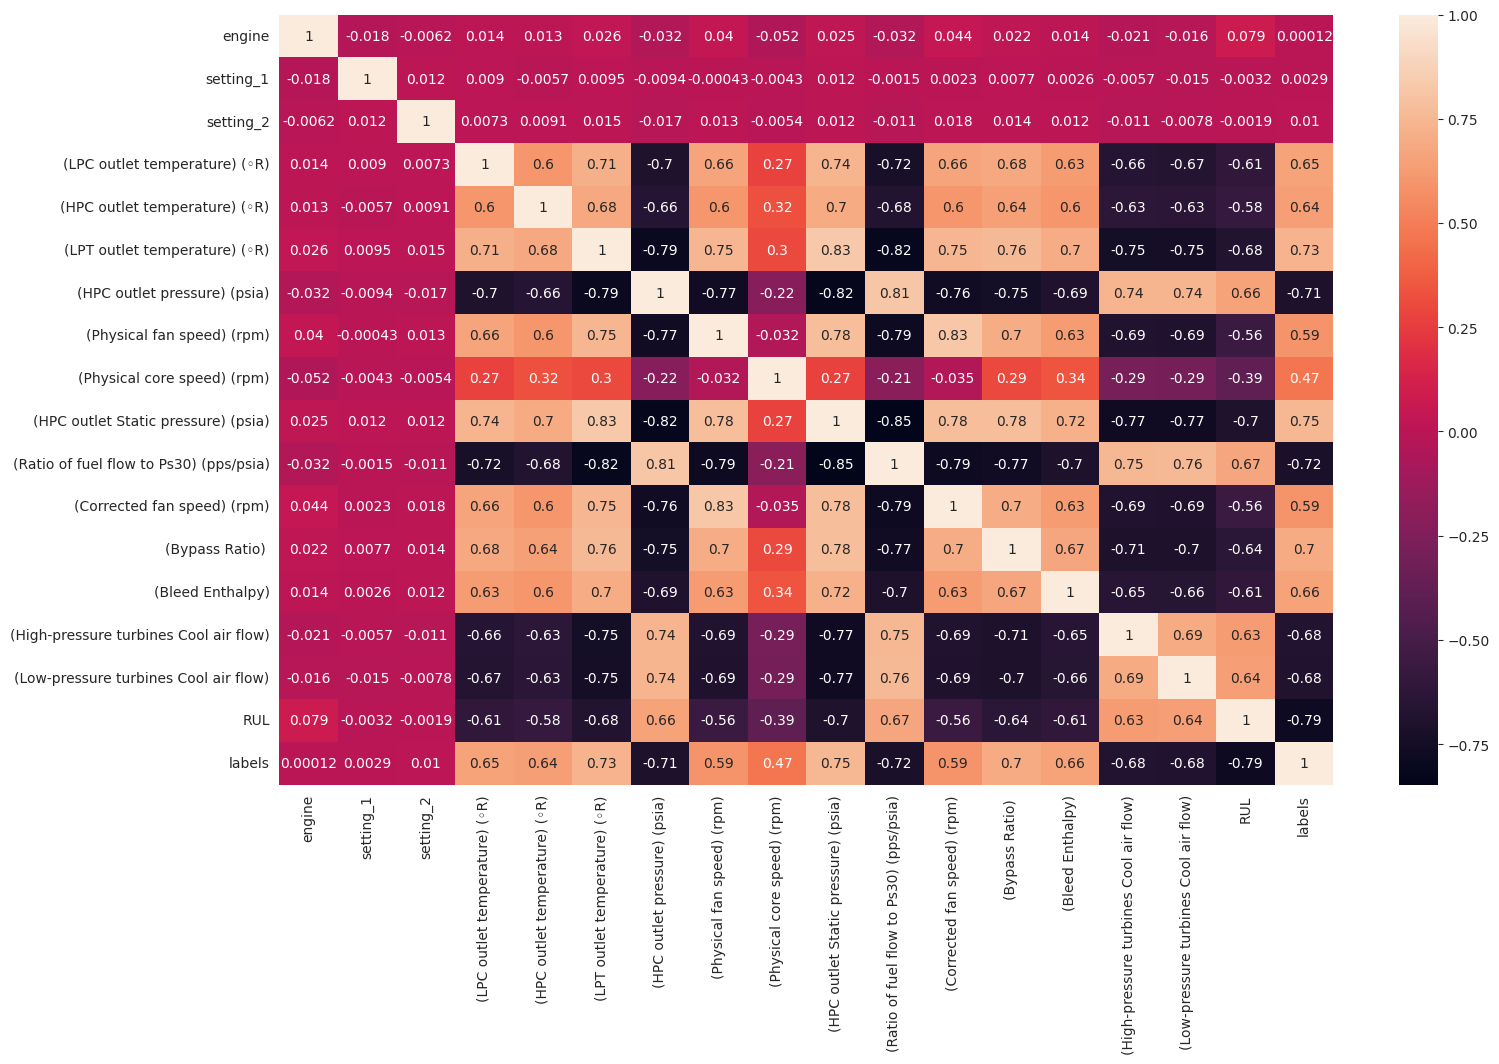

In [ ]:
plt.figure(figsize=(17,10))
sns.heatmap(df_train.corr(), annot=True )
plt.show()

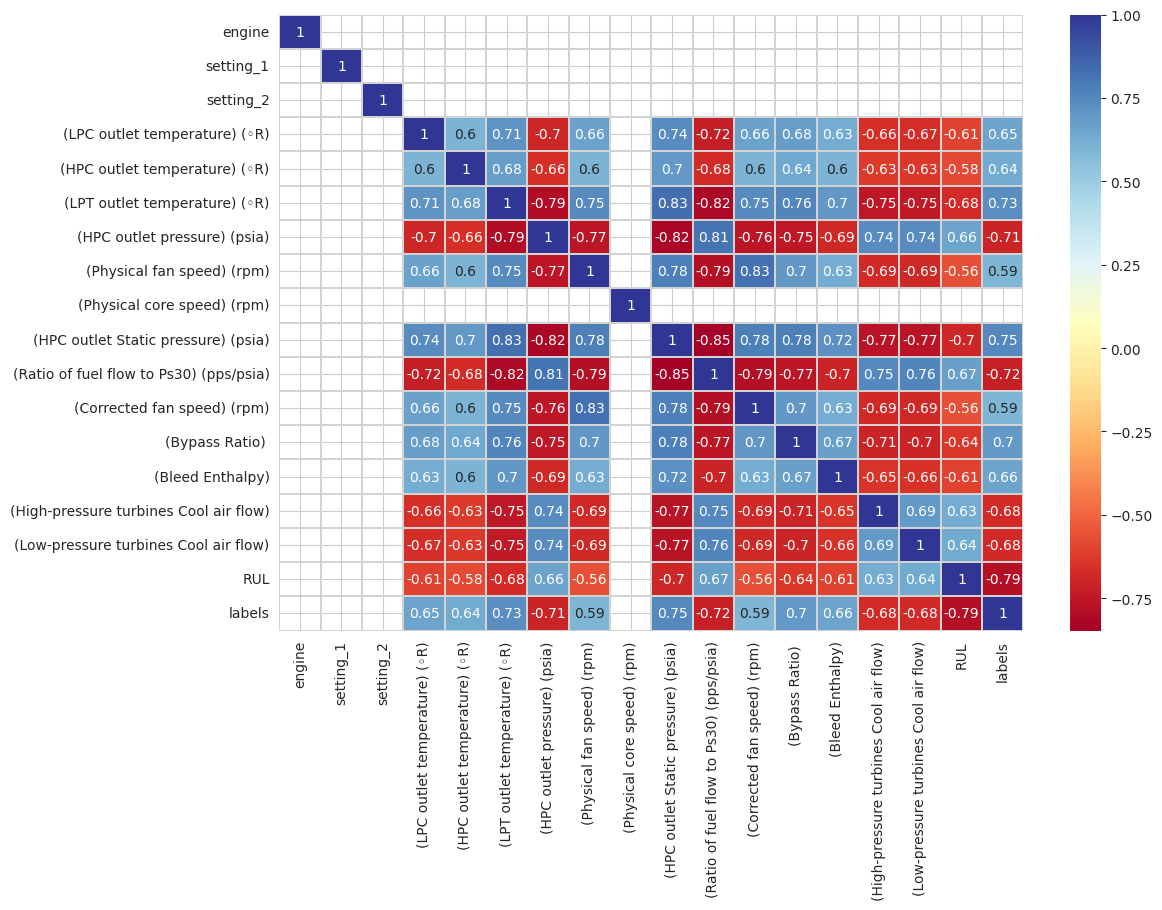

In [ ]:
plt.figure(figsize=(12,8))
threshold = 0.5
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = df_train.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2, cmap='RdYlBu', annot=True, mask=mask, linewidths=0.2, linecolor='lightgrey').set_facecolor('white')

according to data the below columns has less correlation with RUL so we can drop these columns
1.   engine   
2.   setting_1
3.   setting_2
4.   (Physical fan speed) (rpm)
5.   (Physical core speed) (rpm)

In [ ]:
df_train.drop(columns=['engine','setting_1','setting_2', '(Physical core speed) (rpm)', '(Physical fan speed) (rpm)'], inplace=True)

In [ ]:
Y = df_train["labels"].values
X = df_train.drop(labels = ["labels"], axis=1)

from keras.utils import normalize
X = normalize(X, axis=1)

MinMaxScaler is useful when the data has a bounded range or when the distribution is not Gaussian. For example, in image processing, pixel values are typically in the range of 0-255. Scaling these values using MinMaxScaler ensures that the values are within a fixed range and contributes equally to the analysis.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x = sc.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

print('x_train shape : ',x_train.shape)
print('x_test shape : ',x_test.shape)
print('y_train shape : ',y_train.shape)
print('y_test shape : ',y_test.shape)

x_train shape :  (16504, 12)
x_test shape :  (4127, 12)
y_train shape :  (16504,)
y_test shape :  (4127,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn import metrics

models= [
         ('Logestic Regression',LogisticRegression(max_iter=900)),
         ('SVM',SVC(kernel='linear')),
         ('Random Forest Classifier',RandomForestClassifier()),
         ('KNeighbors Classifier',KNeighborsClassifier()),
         ('Decision Tree', DecisionTreeClassifier()),
         ('AdaBoost Classifier',AdaBoostClassifier()),
         ('XGB Classifier',XGBClassifier()),
         ('LightGBM Classifier',LGBMClassifier()),
         ('GaussianNB',GaussianNB())]

ModelName = []
Train_Acc = []
Test_Acc = []

for name, model in models:
    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred  = model.predict(x_test)

    train_acc = metrics.accuracy_score(y_train, y_train_pred)
    test_acc = metrics.accuracy_score(y_test, y_test_pred)

    ModelName.extend([name])
    Train_Acc.extend([train_acc])
    Test_Acc.extend([test_acc])

print(pd.DataFrame({'ModelName': ModelName,
                    'Train_Acc': Train_Acc,
                    'Test_Acc': Test_Acc  }))

                  ModelName  Train_Acc  Test_Acc
0       Logestic Regression   0.892450  0.897020
1                       SVM   0.899540  0.900654
2  Random Forest Classifier   1.000000  0.907439
3     KNeighbors Classifier   0.902327  0.867701
4             Decision Tree   1.000000  0.861401
5       AdaBoost Classifier   0.752666  0.751878
6            XGB Classifier   0.989942  0.898231
7       LightGBM Classifier   0.968311  0.902835
8                GaussianNB   0.829556  0.834262


In [ ]:
df_train['labels'].value_counts()

0    12338
2     4163
1     4130
Name: labels, dtype: int64

#Handling Imbalance dataset

In [ ]:
from imblearn.over_sampling import SMOTE
X_smote, Y_smote = SMOTE().fit_resample(X, Y)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, Y_smote, test_size=0.2, random_state=42)

(unique, counts) = np.unique(Y, return_counts=True)
print("Original data: ", unique, counts)

(unique2, counts2) = np.unique(Y_smote, return_counts=True)
print("After SMOTE: ", unique2, counts2)

Original data:  [0 1 2] [12338  4130  4163]
After SMOTE:  [0 1 2] [12338 12338 12338]


LOGISTIC REGRESSION


In [ ]:
model_LR = LogisticRegression(max_iter=900)
model_LR.fit(X_train_smote, y_train_smote)
LR_prediction_smote = model_LR.predict(X_test_smote)

accuracy = metrics.accuracy_score(y_test_smote, LR_prediction_smote)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(LR_prediction_smote, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_smote, LR_prediction_smote)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smote, LR_prediction_smote, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smote, LR_prediction_smote, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

Accuracy: 0.8360124273942996

Count of predicted label: [0 1 2] [2347 1966 3090]

Confusion Metrics: 
 [[2145  314    0]
 [ 202 1604  650]
 [   0   48 2440]]

Precision Values for:  0.8396286586099522
Recall Values for:  0.8360124273942996
F-Measure Values for:  0.8378166408752581


RANDOM FOREST

In [ ]:
model_SMOTE = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_SMOTE.fit(X_train_smote, y_train_smote)

RF_prediction_smote = model_SMOTE.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, RF_prediction_smote))
print()

(unique, counts) = np.unique(RF_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, RF_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smote, RF_prediction_smote, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smote, RF_prediction_smote, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

Accuracy =  0.9267864379305687

Count of predicted labels:  [0 1 2] [2366 2572 2465]

Confusion Metrics after SMOTE: 
 [[2236  223    0]
 [ 130 2243   83]
 [   0  106 2382]]

Precision Values for:  0.9279959375745364
Recall Values for:  0.9267864379305687
F-Measure Values for:  0.9273907933964793


KNN

In [ ]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train_smote, y_train_smote)

KNN_prediction_smote = model_KNN.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, KNN_prediction_smote))
print()

(unique, counts) = np.unique(KNN_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, KNN_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smote, KNN_prediction_smote, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smote, KNN_prediction_smote, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

Accuracy =  0.9138187221396731

Count of predicted labels:  [0 1 2] [2257 2684 2462]

Confusion Metrics after SMOTE: 
 [[2141  318    0]
 [ 116 2251   89]
 [   0  115 2373]]

Precision Values for:  0.9172579501727904
Recall Values for:  0.9138187221396731
F-Measure Values for:  0.9155351062834355


Decision Tree


In [ ]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train_smote, y_train_smote)

DT_prediction_smote = model_DT.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, DT_prediction_smote))
print()

(unique, counts) = np.unique(DT_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, DT_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smote, DT_prediction_smote, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smote, DT_prediction_smote, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

Accuracy =  0.899635282993381

Count of predicted labels:  [0 1 2] [2394 2521 2488]

Confusion Metrics after SMOTE: 
 [[2193  264    2]
 [ 201 2118  137]
 [   0  139 2349]]

Precision Values for:  0.9003016783041132
Recall Values for:  0.899635282993381
F-Measure Values for:  0.8999683572881185


ADABOOST

In [ ]:
model_AdaBoost = AdaBoostClassifier()
model_AdaBoost.fit(X_train_smote, y_train_smote)

AdaBoost_prediction_smote = model_AdaBoost.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, AdaBoost_prediction_smote))
print()

(unique, counts) = np.unique(AdaBoost_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, AdaBoost_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smote, AdaBoost_prediction_smote, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smote, AdaBoost_prediction_smote, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

Accuracy =  0.5878697825205997

Count of predicted labels:  [0 1 2] [  20 4459 2924]

Confusion Metrics after SMOTE: 
 [[  19 2440    0]
 [   1 1932  523]
 [   0   87 2401]]

Precision Values for:  0.7352658516394842
Recall Values for:  0.5878697825205997
F-Measure Values for:  0.6533579251268673


XGBoost

In [ ]:
model_XGB = XGBClassifier()
model_XGB.fit(X_train_smote, y_train_smote)

XGB_prediction_smote = model_XGB.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, XGB_prediction_smote))
print()

(unique, counts) = np.unique(XGB_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, XGB_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smote, XGB_prediction_smote, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smote, XGB_prediction_smote, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

Accuracy =  0.9130082399027422

Count of predicted labels:  [0 1 2] [2382 2560 2461]

Confusion Metrics after SMOTE: 
 [[2218  241    0]
 [ 164 2186  106]
 [   0  133 2355]]

Precision Values for:  0.9141874079068627
Recall Values for:  0.9130082399027422
F-Measure Values for:  0.913597443420867


LIGHT GBM

In [ ]:
model_LGBM = LGBMClassifier()
model_LGBM.fit(X_train_smote, y_train_smote)

LGBM_prediction_smote = model_LGBM.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, LGBM_prediction_smote))
print()

(unique, counts) = np.unique(LGBM_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, LGBM_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smote, LGBM_prediction_smote, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smote, LGBM_prediction_smote, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

Accuracy =  0.9084155072268

Count of predicted labels:  [0 1 2] [2378 2558 2467]

Confusion Metrics after SMOTE: 
 [[2211  248    0]
 [ 167 2168  121]
 [   0  142 2346]]

Precision Values for:  0.9096086481601672
Recall Values for:  0.9084155072268
F-Measure Values for:  0.9090116861735792


Gaussian Naive Bayes

In [ ]:
model_NB = GaussianNB()
model_NB.fit(X_train_smote, y_train_smote)

NB_prediction_smote = model_NB.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, NB_prediction_smote))
print()

(unique, counts) = np.unique(NB_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, NB_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smote, NB_prediction_smote, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smote, NB_prediction_smote, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

Accuracy =  0.8142644873699851

Count of predicted labels:  [0 1 2] [2472 2586 2345]

Confusion Metrics after SMOTE: 
 [[2079  380    0]
 [ 392 1834  230]
 [   1  372 2115]]

Precision Values for:  0.8177556016259373
Recall Values for:  0.8142644873699851
F-Measure Values for:  0.8160063105124452


#SMOTE-ENN

In [ ]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X, Y)

(unique, counts) = np.unique(Y, return_counts=True)
print("Original data: ", unique, counts)

(unique2, counts2) = np.unique(y_resampled, return_counts=True)
print("After SMOTEENN: ", unique2, counts2)

X_train_smoteenn, X_test_smoteenn, y_train_smoteenn, y_test_smoteenn = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Original data:  [0 1 2] [12338  4130  4163]
After SMOTEENN:  [0 1 2] [ 9957 10403 11630]


LOGISTIC REGRESSION


Accuracy: 0.8346358236949046

Count of predicted label: [0 1 2] [1954 1283 3161]

Confusion Metrics: 
 [[1887  120    0]
 [  67 1161  869]
 [   0    2 2292]]

Precision Values for:  0.8595075513068361
Recall Values for:  0.8346358236949046
F-Measure Values for:  0.8468891165202999


<Axes: >

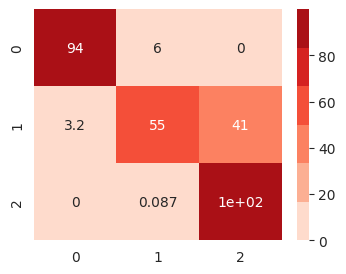

In [ ]:
model_LR = LogisticRegression(max_iter=900)
model_LR.fit(X_train_smoteenn, y_train_smoteenn)
LR_prediction_smoteenn = model_LR.predict(X_test_smoteenn)

accuracy = metrics.accuracy_score(y_test_smoteenn, LR_prediction_smoteenn)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(LR_prediction_smoteenn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_smoteenn, LR_prediction_smoteenn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteenn, LR_prediction_smoteenn, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteenn, LR_prediction_smoteenn, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteenn, LR_prediction_smoteenn, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

RANDOM FOREST

Accuracy: 0.9751484839012191

Count of predicted label: [0 1 2] [1990 2136 2272]

Confusion Metrics: 
 [[1955   52    0]
 [  35 2037   25]
 [   0   47 2247]]

Precision Values for:  0.9753464382353859
Recall Values for:  0.9751484839012191
F-Measure Values for:  0.9752474510231806


<Axes: >

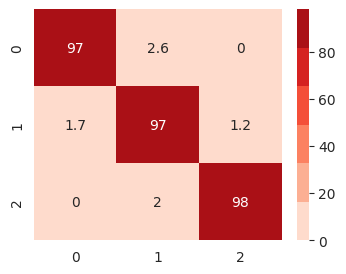

In [ ]:
model_RF = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_RF.fit(X_train_smoteenn, y_train_smoteenn)

RF_prediction_smoteenn = model_RF.predict(X_test_smoteenn)
accuracy = metrics.accuracy_score(y_test_smoteenn, RF_prediction_smoteenn)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(RF_prediction_smoteenn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteenn, RF_prediction_smoteenn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteenn, RF_prediction_smoteenn, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteenn, RF_prediction_smoteenn, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteenn, RF_prediction_smoteenn, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

KNN

Accuracy: 0.9792122538293216

Count of predicted label: [0 1 2] [1958 2160 2280]

Confusion Metrics: 
 [[1948   59    0]
 [  10 2062   25]
 [   0   39 2255]]

Precision Values for:  0.9795959001561094
Recall Values for:  0.9792122538293216
F-Measure Values for:  0.9794040394228025


<Axes: >

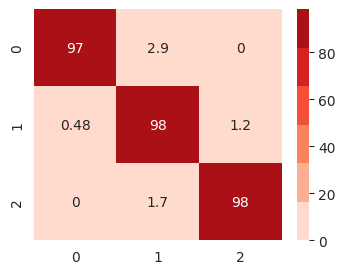

In [ ]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train_smoteenn, y_train_smoteenn)

KNN_prediction_smoteenn = model_KNN.predict(X_test_smoteenn)
accuracy = metrics.accuracy_score(y_test_smoteenn, KNN_prediction_smoteenn)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(KNN_prediction_smoteenn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteenn, KNN_prediction_smoteenn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteenn, KNN_prediction_smoteenn, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteenn, KNN_prediction_smoteenn, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteenn, KNN_prediction_smoteenn, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

Decision Tree


Accuracy: 0.9543607377305408

Count of predicted label: [0 1 2] [1977 2141 2280]

Confusion Metrics: 
 [[1931   76    0]
 [  46 1973   78]
 [   0   92 2202]]

Precision Values for:  0.9547164141238013
Recall Values for:  0.9543607377305408
F-Measure Values for:  0.9545385427944879


<Axes: >

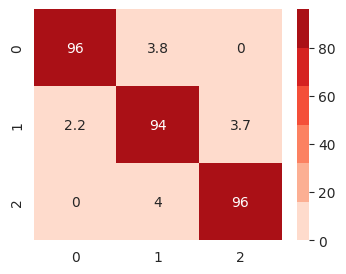

In [ ]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train_smoteenn, y_train_smoteenn)

DT_prediction_smoteenn = model_DT.predict(X_test_smoteenn)
accuracy = metrics.accuracy_score(y_test_smoteenn, DT_prediction_smoteenn)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(DT_prediction_smoteenn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteenn, DT_prediction_smoteenn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteenn, DT_prediction_smoteenn, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteenn, DT_prediction_smoteenn, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteenn, DT_prediction_smoteenn, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

ADABOOST

Accuracy: 0.7353860581431697

Count of predicted label: [0 1 2] [ 645 3450 2303]

Confusion Metrics: 
 [[ 629 1378    0]
 [  16 1927  154]
 [   0  145 2149]]

Precision Values for:  0.823553711591403
Recall Values for:  0.7353860581431697
F-Measure Values for:  0.7769766727286638


<Axes: >

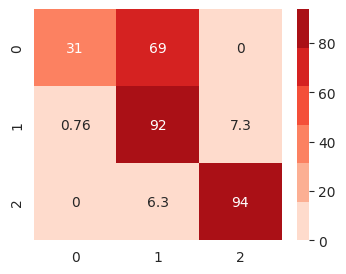

In [ ]:
model_AdaBoost = AdaBoostClassifier()
model_AdaBoost.fit(X_train_smoteenn, y_train_smoteenn)

AdaBoost_prediction_smoteenn = model_AdaBoost.predict(X_test_smoteenn)
accuracy = metrics.accuracy_score(y_test_smoteenn, AdaBoost_prediction_smoteenn)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(AdaBoost_prediction_smoteenn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteenn, AdaBoost_prediction_smoteenn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteenn, AdaBoost_prediction_smoteenn, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteenn, AdaBoost_prediction_smoteenn, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteenn, AdaBoost_prediction_smoteenn, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

XGBoost

Accuracy: 0.9774929665520475

Count of predicted label: [0 1 2] [1989 2143 2266]

Confusion Metrics: 
 [[1960   47    0]
 [  29 2048   20]
 [   0   48 2246]]

Precision Values for:  0.9777320447700312
Recall Values for:  0.9774929665520475
F-Measure Values for:  0.9776124910442066


<Axes: >

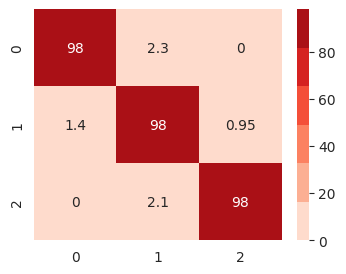

In [ ]:
model_XGB = XGBClassifier()
model_XGB.fit(X_train_smoteenn, y_train_smoteenn)

XGB_prediction_smoteenn = model_XGB.predict(X_test_smoteenn)
accuracy = metrics.accuracy_score(y_test_smoteenn, XGB_prediction_smoteenn)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(XGB_prediction_smoteenn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteenn, XGB_prediction_smoteenn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteenn, XGB_prediction_smoteenn, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteenn, XGB_prediction_smoteenn, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteenn, XGB_prediction_smoteenn, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

LIGHT GBM

Accuracy: 0.9728040012503908

Count of predicted label: [0 1 2] [1989 2133 2276]

Confusion Metrics: 
 [[1954   53    0]
 [  35 2028   34]
 [   0   52 2242]]

Precision Values for:  0.9729894524887325
Recall Values for:  0.9728040012503908
F-Measure Values for:  0.9728967180319942


<Axes: >

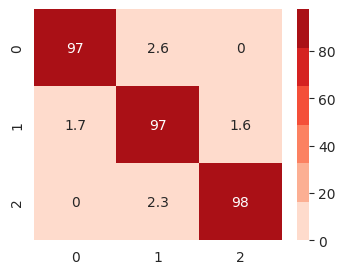

In [ ]:
model_LGBM = LGBMClassifier()
model_LGBM.fit(X_train_smoteenn, y_train_smoteenn)

LGBM_prediction_smoteenn = model_LGBM.predict(X_test_smoteenn)
accuracy = metrics.accuracy_score(y_test_smoteenn, LGBM_prediction_smoteenn)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(LGBM_prediction_smoteenn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteenn, LGBM_prediction_smoteenn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteenn, LGBM_prediction_smoteenn, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteenn, LGBM_prediction_smoteenn, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteenn, LGBM_prediction_smoteenn, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

Gaussian Naive Bayes

Accuracy: 0.8679274773366678

Count of predicted label: [0 1 2] [2101 2178 2119]

Confusion Metrics: 
 [[1866  141    0]
 [ 235 1715  147]
 [   0  322 1972]]

Precision Values for:  0.8703646278124895
Recall Values for:  0.8679274773366678
F-Measure Values for:  0.8691443440865678


<Axes: >

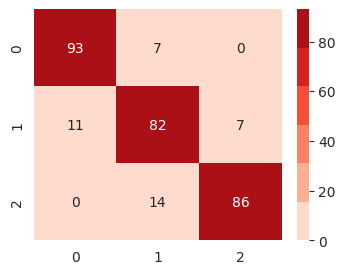

In [ ]:
model_NB = GaussianNB()
model_NB.fit(X_train_smoteenn, y_train_smoteenn)

NB_prediction_smoteenn = model_NB.predict(X_test_smoteenn)
accuracy = metrics.accuracy_score(y_test_smoteenn, NB_prediction_smoteenn)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(NB_prediction_smoteenn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteenn, NB_prediction_smoteenn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteenn, NB_prediction_smoteenn, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteenn, NB_prediction_smoteenn, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteenn, NB_prediction_smoteenn, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

#SMOTE-Tomek

In [ ]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
X_resampled, y_resampled = smote_tomek.fit_resample(X, Y)

(unique, counts) = np.unique(Y, return_counts=True)
print("Original data: ", unique, counts)

(unique2, counts2) = np.unique(y_resampled, return_counts=True)
print("After SMOTE-tomek: ", unique2, counts2)

X_train_smoteTomek, X_test_smoteTomek, y_train_smoteTomek, y_test_smoteTomek = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Original data:  [0 1 2] [12338  4130  4163]
After SMOTE-tomek:  [0 1 2] [12202 12188 12320]


Logistic Regression

Accuracy of Logistic Regression after SMOTETomek: 0.836284391174067

Count of predicted label: [0 1 2] [2352 1872 3118]

Confusion Metrics: 
 [[2145  271    0]
 [ 207 1549  672]
 [   0   52 2446]]

Precision Values for:  0.8406507360772798
Recall Values for:  0.836284391174067
F-Measure Values for:  0.8384618791577702


<Axes: >

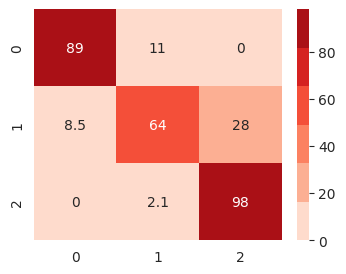

In [ ]:
model_LR = LogisticRegression(max_iter=900)
model_LR.fit(X_train_smoteTomek, y_train_smoteTomek)
LR_prediction_smoteTomek = model_LR.predict(X_test_smoteTomek)

accuracy = metrics.accuracy_score(y_test_smoteTomek, LR_prediction_smoteTomek)
print("Accuracy of Logistic Regression after SMOTETomek:", accuracy)
print()

(unique, counts) = np.unique(LR_prediction_smoteTomek, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_smoteTomek, LR_prediction_smoteTomek)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteTomek, LR_prediction_smoteTomek, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteTomek, LR_prediction_smoteTomek, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteTomek, LR_prediction_smoteTomek, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

RANDOM FOREST

Accuracy of Random Forest after SMOTETomek =  0.938981204031599

Count of predicted labels:  [0 1 2] [2327 2574 2441]

Confusion Metrics after SMOTETomek: 
 [[2231  185    0]
 [  96 2277   55]
 [   0  112 2386]]

Precision Values for:  0.940600676091254
Recall Values for:  0.938981204031599
F-Measure Values for:  0.9397902423823896


<Axes: >

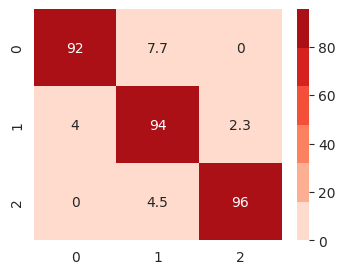

In [ ]:
model_RF = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_RF.fit(X_train_smoteTomek, y_train_smoteTomek)

RF_prediction_smoteTomek = model_RF.predict(X_test_smoteTomek)
print ("Accuracy of Random Forest after SMOTETomek = ", metrics.accuracy_score(y_test_smoteTomek, RF_prediction_smoteTomek))
print()

(unique, counts) = np.unique(RF_prediction_smoteTomek, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteTomek, RF_prediction_smoteTomek)
print("Confusion Metrics after SMOTETomek: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteTomek, RF_prediction_smoteTomek, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteTomek, RF_prediction_smoteTomek, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteTomek, RF_prediction_smoteTomek, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

KNN

Accuracy =  0.9218196676654863

Count of predicted labels:  [0 1 2] [2225 2640 2477]

Confusion Metrics after SMOTETomek: 
 [[2129  287    0]
 [  96 2247   85]
 [   0  106 2392]]

Precision Values for:  0.9248975159682075
Recall Values for:  0.9218196676654863
F-Measure Values for:  0.9233560269546529


<Axes: >

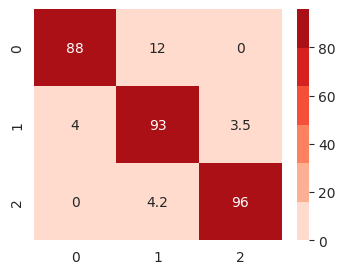

In [ ]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train_smoteTomek, y_train_smoteTomek)

KNN_prediction_smoteTomek = model_KNN.predict(X_test_smoteTomek)
print ("Accuracy = ", metrics.accuracy_score(y_test_smoteTomek, KNN_prediction_smoteTomek))
print()

(unique, counts) = np.unique(KNN_prediction_smoteTomek, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteTomek, KNN_prediction_smoteTomek)
print("Confusion Metrics after SMOTETomek: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteTomek, KNN_prediction_smoteTomek, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteTomek, KNN_prediction_smoteTomek, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteTomek, KNN_prediction_smoteTomek, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

Decision Tree

Accuracy =  0.9042495232906564

Count of predicted labels:  [0 1 2] [2359 2486 2497]

Confusion Metrics after SMOTETomek: 
 [[2173  242    1]
 [ 186 2106  136]
 [   0  138 2360]]

Precision Values for:  0.9048374427338035
Recall Values for:  0.9042495232906564
F-Measure Values for:  0.904543387480816


<Axes: >

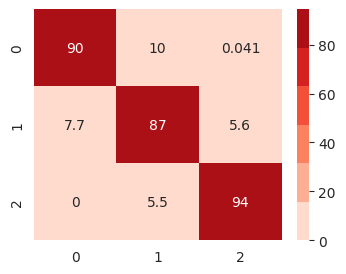

In [ ]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train_smoteTomek, y_train_smoteTomek)

DT_prediction_smoteTomek = model_DT.predict(X_test_smoteTomek)
print ("Accuracy = ", metrics.accuracy_score(y_test_smoteTomek, DT_prediction_smoteTomek))
print()

(unique, counts) = np.unique(DT_prediction_smoteTomek, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteTomek, DT_prediction_smoteTomek)
print("Confusion Metrics after SMOTETomek: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteTomek, DT_prediction_smoteTomek, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteTomek, DT_prediction_smoteTomek, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteTomek, DT_prediction_smoteTomek, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

AdaBoost

Accuracy =  0.8372378098610733

Count of predicted labels:  [0 1 2] [2836 1790 2716]

Confusion Metrics after SMOTETomek: 
 [[2285  130    1]
 [ 551 1512  365]
 [   0  148 2350]]

Precision Values for:  0.8388575099127767
Recall Values for:  0.8372378098610733
F-Measure Values for:  0.8380468772857727


<Axes: >

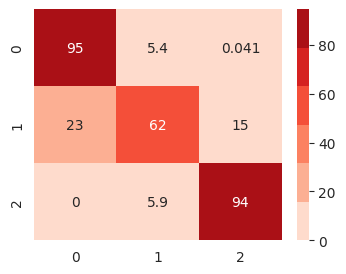

In [ ]:
model_AdaBoost = AdaBoostClassifier()
model_AdaBoost.fit(X_train_smoteTomek, y_train_smoteTomek)

AdaBoost_prediction_smoteTomek = model_AdaBoost.predict(X_test_smoteTomek)
print ("Accuracy = ", metrics.accuracy_score(y_test_smoteTomek, AdaBoost_prediction_smoteTomek))
print()

(unique, counts) = np.unique(AdaBoost_prediction_smoteTomek, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteTomek, AdaBoost_prediction_smoteTomek)
print("Confusion Metrics after SMOTETomek: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteTomek, AdaBoost_prediction_smoteTomek, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteTomek, AdaBoost_prediction_smoteTomek, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteTomek, AdaBoost_prediction_smoteTomek, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

XGBOOST

Accuracy =  0.9207300463089076

Count of predicted labels:  [0 1 2] [2356 2558 2428]

Confusion Metrics after SMOTETomek: 
 [[2212  204    0]
 [ 144 2202   82]
 [   0  152 2346]]

Precision Values for:  0.9223727787132875
Recall Values for:  0.9207300463089076
F-Measure Values for:  0.9215506804386067


<Axes: >

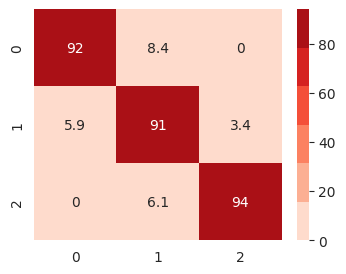

In [ ]:
model_XGB = XGBClassifier()
model_XGB.fit(X_train_smoteTomek, y_train_smoteTomek)

XGB_prediction_smoteTomek = model_XGB.predict(X_test_smoteTomek)
print ("Accuracy = ", metrics.accuracy_score(y_test_smoteTomek, XGB_prediction_smoteTomek))
print()

(unique, counts) = np.unique(XGB_prediction_smoteTomek, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteTomek, XGB_prediction_smoteTomek)
print("Confusion Metrics after SMOTETomek: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteTomek, XGB_prediction_smoteTomek, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteTomek, XGB_prediction_smoteTomek, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteTomek, XGB_prediction_smoteTomek, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

Light GBM

Accuracy =  0.9148733315172978

Count of predicted labels:  [0 1 2] [2358 2557 2427]

Confusion Metrics after SMOTETomek: 
 [[2206  210    0]
 [ 152 2180   96]
 [   0  167 2331]]

Precision Values for:  0.9165721039313263
Recall Values for:  0.9148733315172978
F-Measure Values for:  0.9157219298690861


<Axes: >

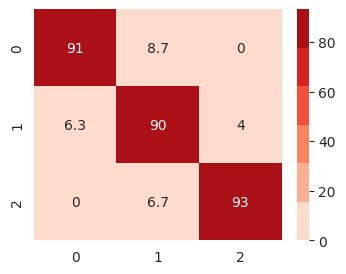

In [ ]:
model_LGBM = LGBMClassifier()
model_LGBM.fit(X_train_smoteTomek, y_train_smoteTomek)

LGBM_prediction_smoteTomek = model_LGBM.predict(X_test_smoteTomek)
print ("Accuracy = ", metrics.accuracy_score(y_test_smoteTomek, LGBM_prediction_smoteTomek))
print()

(unique, counts) = np.unique(LGBM_prediction_smoteTomek, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteTomek, LGBM_prediction_smoteTomek)
print("Confusion Metrics after SMOTETomek: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteTomek, LGBM_prediction_smoteTomek, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteTomek, LGBM_prediction_smoteTomek, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteTomek, LGBM_prediction_smoteTomek, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

GAUSSIAN MAIVE BAYES

Accuracy =  0.8064560065377281

Count of predicted labels:  [0 1 2] [2472 2573 2297]

Confusion Metrics after SMOTETomek: 
 [[2057  359    0]
 [ 415 1790  223]
 [   0  424 2074]]

Precision Values for:  0.8110886836495002
Recall Values for:  0.8064560065377281
F-Measure Values for:  0.8087657110582912


<Axes: >

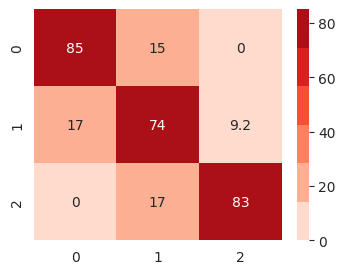

In [ ]:
model_NB = GaussianNB()
model_NB.fit(X_train_smoteTomek, y_train_smoteTomek)

NB_prediction_smoteTomek = model_NB.predict(X_test_smoteTomek)
print ("Accuracy = ", metrics.accuracy_score(y_test_smoteTomek, NB_prediction_smoteTomek))
print()

(unique, counts) = np.unique(NB_prediction_smoteTomek, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteTomek, NB_prediction_smoteTomek)
print("Confusion Metrics after SMOTETomek: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteTomek, NB_prediction_smoteTomek, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteTomek, NB_prediction_smoteTomek, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteTomek, NB_prediction_smoteTomek, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

#ANN

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn import metrics

In [ ]:
import tensorflow as tf

In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=500, activation='relu'))
# ann2.add(tf.keras.layers.Dense(units=250, activation='relu'))
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann.add(tf.keras.layers.Dense(units=50, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
ann.fit(x_train, y_train ,batch_size = 32, epochs = 10,verbose=2)

Epoch 1/10
516/516 - 2s - loss: 0.1111 - 2s/epoch - 5ms/step
Epoch 2/10
516/516 - 1s - loss: 0.0827 - 1s/epoch - 2ms/step
Epoch 3/10
516/516 - 1s - loss: 0.0789 - 1s/epoch - 2ms/step
Epoch 4/10
516/516 - 2s - loss: 0.0775 - 2s/epoch - 3ms/step
Epoch 5/10
516/516 - 2s - loss: 0.0761 - 2s/epoch - 4ms/step
Epoch 6/10
516/516 - 1s - loss: 0.0774 - 1s/epoch - 3ms/step
Epoch 7/10
516/516 - 1s - loss: 0.0768 - 1s/epoch - 2ms/step
Epoch 8/10
516/516 - 1s - loss: 0.0764 - 1s/epoch - 2ms/step
Epoch 9/10
516/516 - 1s - loss: 0.0762 - 1s/epoch - 2ms/step
Epoch 10/10
516/516 - 1s - loss: 0.0757 - 1s/epoch - 2ms/step


In [ ]:
ann_pred = ann.predict(x_test)

129/129 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
mse = mean_squared_error(y_test, ann_pred) # evaluate the performance of the model
rmse = np.sqrt(mse)
r2 = r2_score(y_test,ann_pred)
print(mse)
print(rmse)
print(r2)

0.06823025604981929
0.2612092189219578
0.8915301266831075
